# HOUSE PRICE PREDICTION
<hr>


# Objectives and Steps of prediction
<hr>

This prediction is to forecast house prices 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The analysis will be following in the steps below (this is initial idea, will be changed later on)  

<br><br>



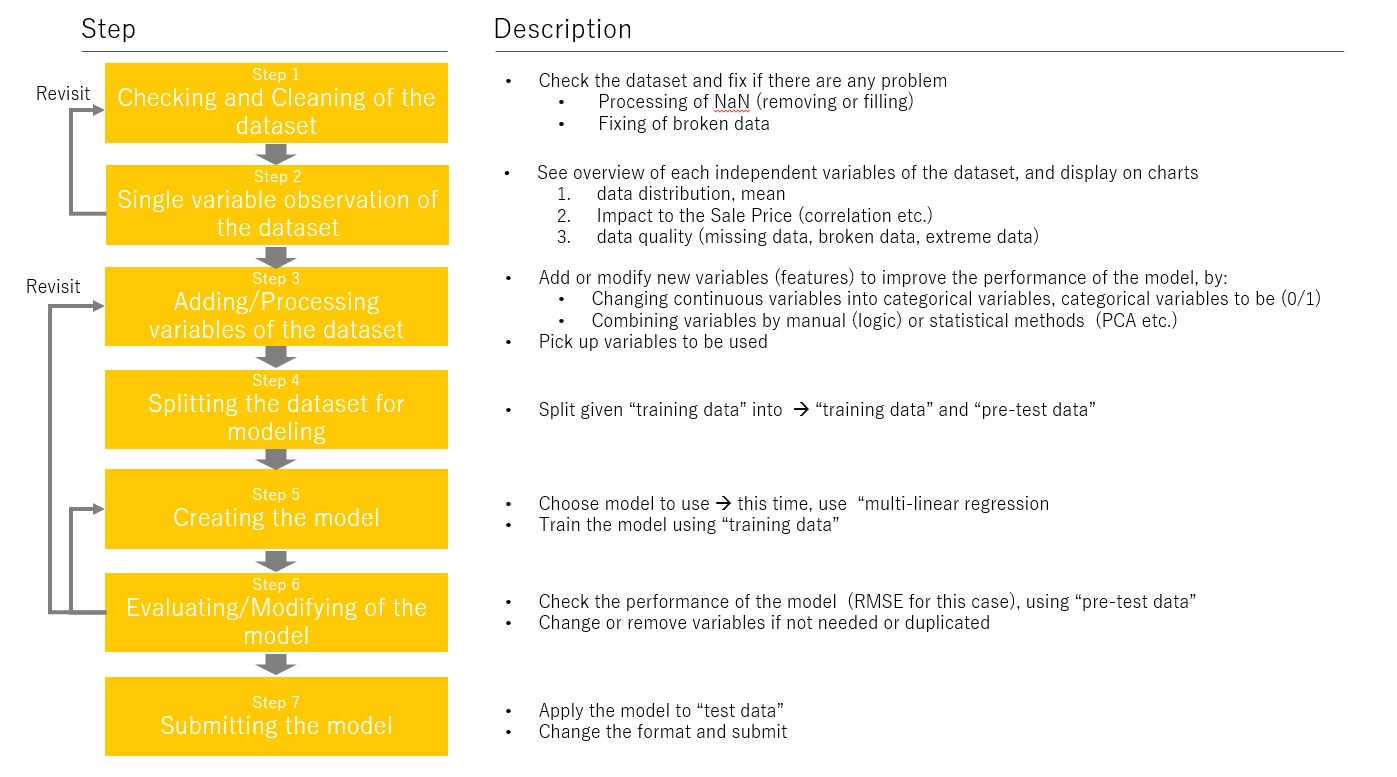

In [136]:
from IPython.display import Image
Image(filename= 'Steps_of_prediction1106.jpg')

<br><br><br><br>
# Step 1 :  Checking and Clearning of the dataset
<hr>

Here, import the training data and check if there is any missing data. 
If needed, clean them (ex. fill NaN) 

<br><br><br>
### Import training data
<hr>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('../data/train.csv')

<br><br><br>
### Check the data
<hr>

In [5]:
train_df.shape

(1460, 81)

seeing above, there are 81 data, including 1 data to be predicted ('SalePrice') 

Number of sample is 1460

The key parameters of the predicted dependent value ('SalePrice') is as below:

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<br><br><br>
### Clean the data
<hr>

The data set are combination of number and non-number data. (object, that is actually string) 

Some variables are missing and not available for all samples, and many NaN data for non-number (object) variables. 
Since NaN may have important meaning, here, replace NaN into string "n.a" so that they can be shown in the charts. 

This is done only for non-number variables. 
As for numbre variabes (int, float), keep NaN as it is, since the missing values are limited and not sure which number to use for replacement (0? average?). 

In [8]:
for column_name in train_df:
    dt = train_df[column_name].dtypes
    if dt == 'object':
        train_df[[column_name]] = train_df[[column_name]].fillna(value='n.a')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [148]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,n.a,Reg,Lvl,AllPub,...,0,n.a,n.a,n.a,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,n.a,Reg,Lvl,AllPub,...,0,n.a,n.a,n.a,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,n.a,IR1,Lvl,AllPub,...,0,n.a,n.a,n.a,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,n.a,IR1,Lvl,AllPub,...,0,n.a,n.a,n.a,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,n.a,IR1,Lvl,AllPub,...,0,n.a,n.a,n.a,0,12,2008,WD,Normal,250000


Data of non-number varialbes are filled. 



<br><Br><br>

# Step 2: Single variable observation of the dataset
<hr>

### Observation of target (dependent) variable - 'SalePrice'
<hr>

first, see the data quality and distribution of 'SalePrice' that is the data to be estimated.

In [9]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It seems the data quality is good for SalePrice.

No missing data, no zero data, or no extremely high data

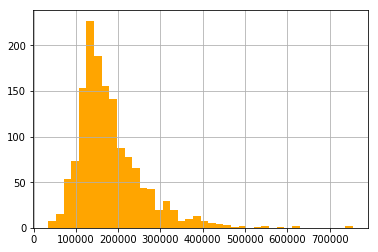

In [10]:
train_df['SalePrice'].hist(bins=40, color='orange')

seeing this, the distribution is like log-normal distribution. 

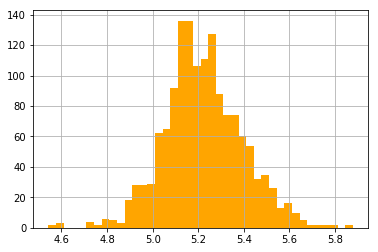

In [11]:
np.log10(train_df['SalePrice']).hist(bins=40, color='orange')

Log of the data is similar to normal distribution. 

It seems there are two peaks.

<br><br><br>
### Observation of independent variables
<hr>

Then, see each variables potentially can be used for estimation. First charting the variables one by one, and then see by collective ways

<br><br>
#### a) Charting by each single data
<hr>

Here, see each independent variable by showing charts. 


For each independent variable, show 2 chart - left one is distribution of number of samples,  right one is relationship between the independent variable and SalePrice.

d:\y-data\venv\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\y-data\venv\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
d:\y-data\venv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPara

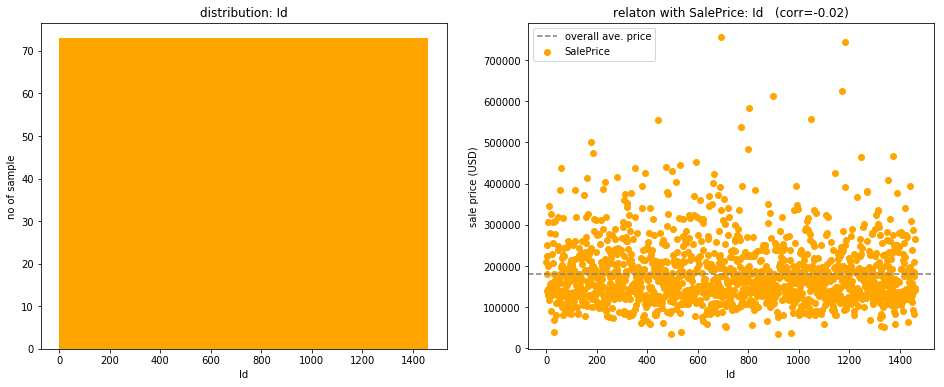

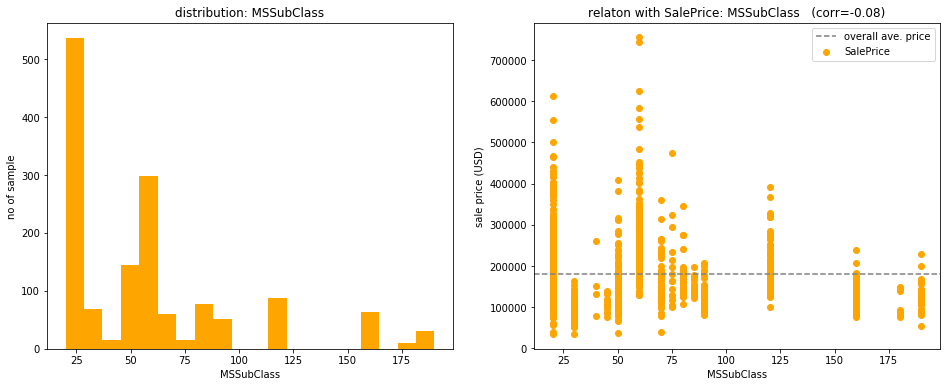

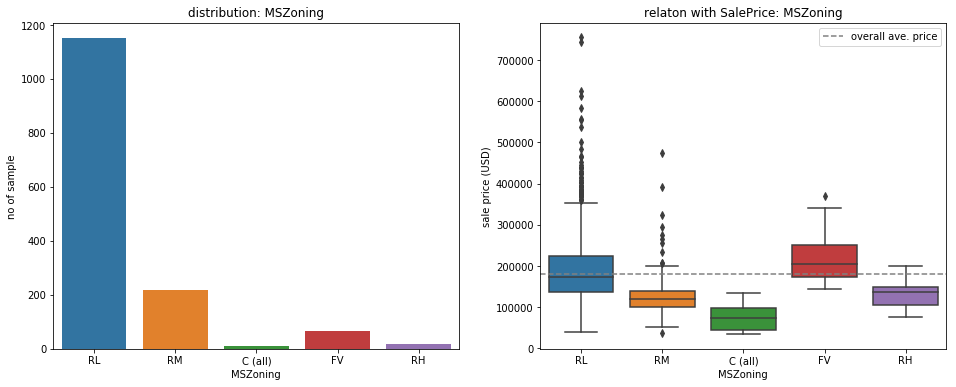

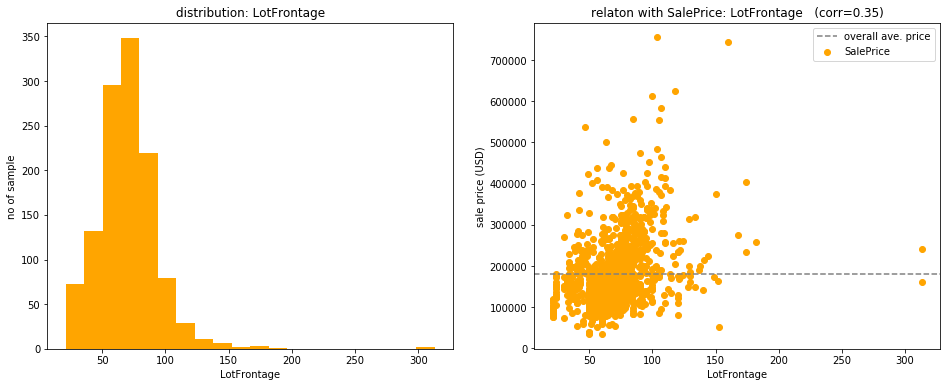

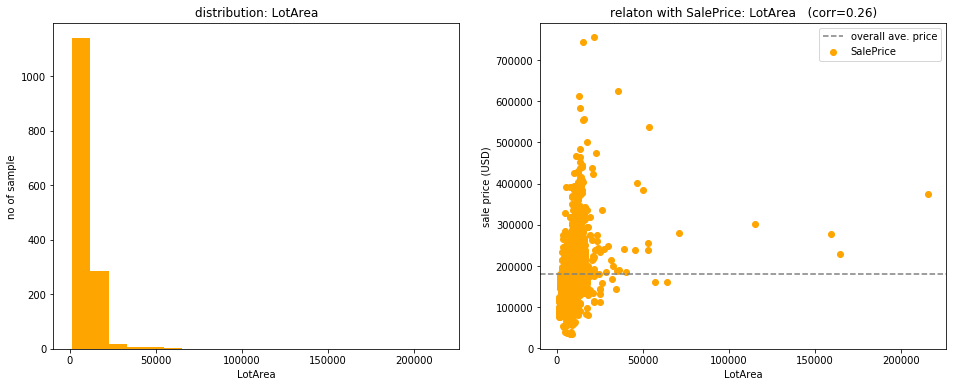

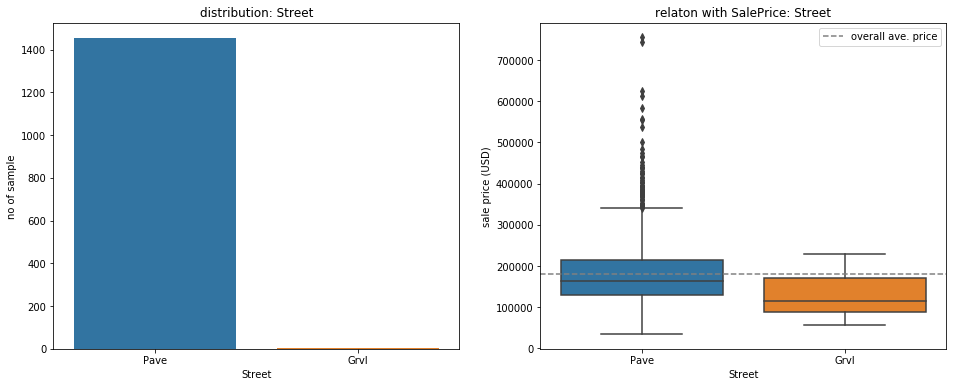

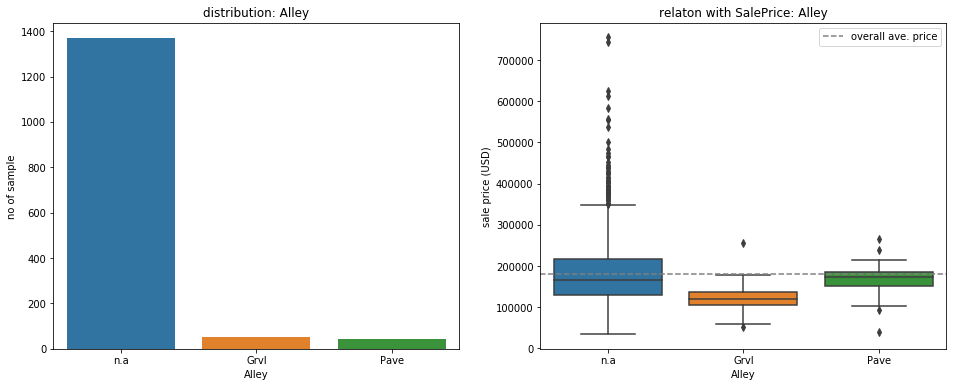

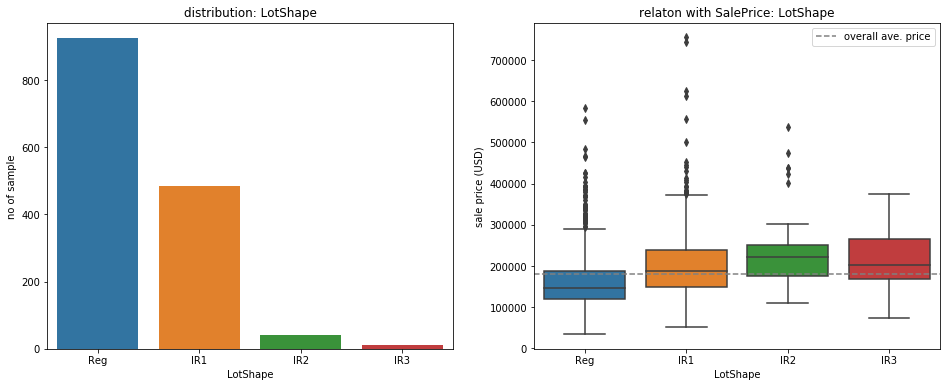

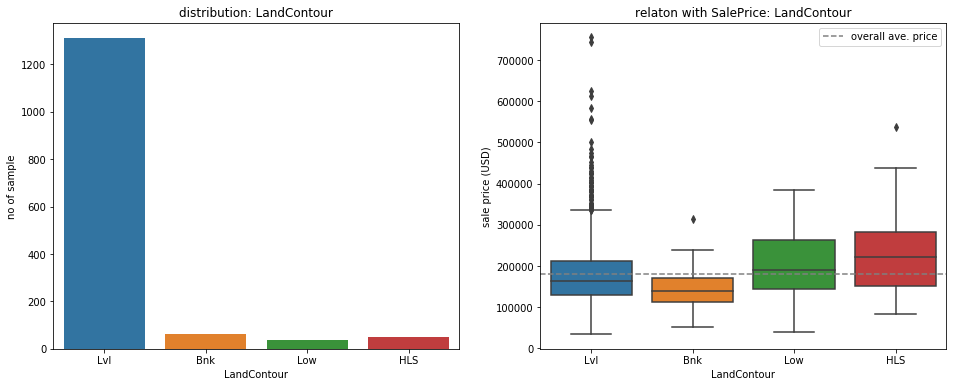

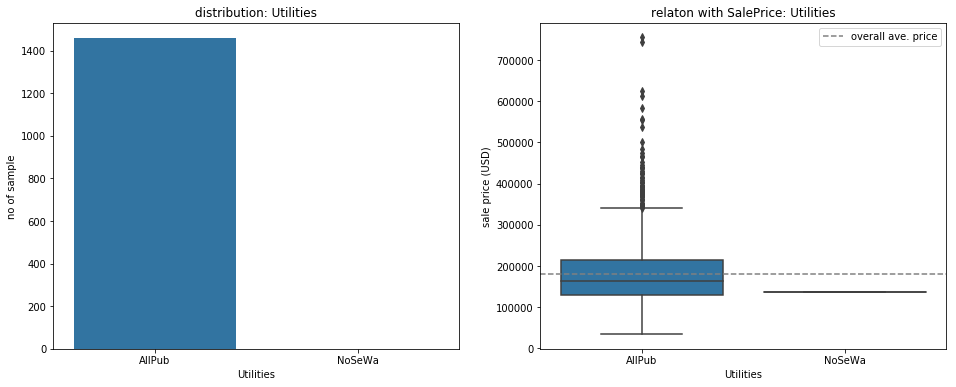

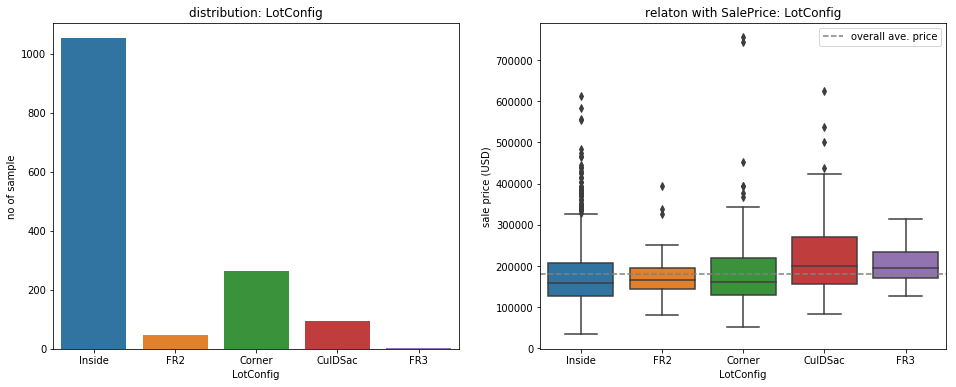

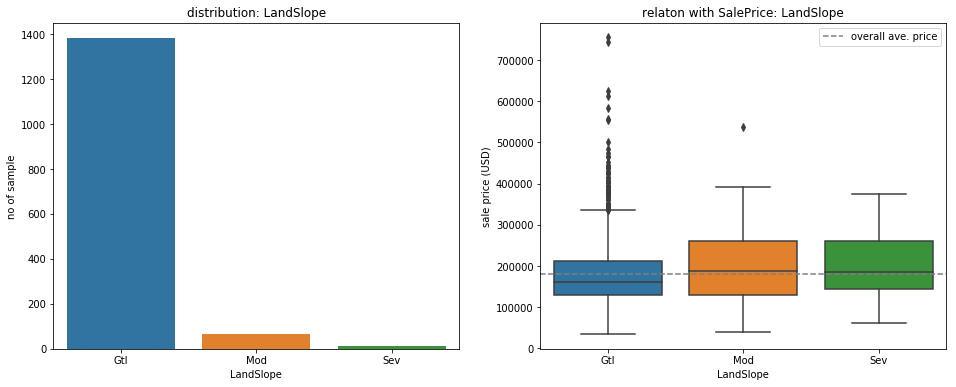

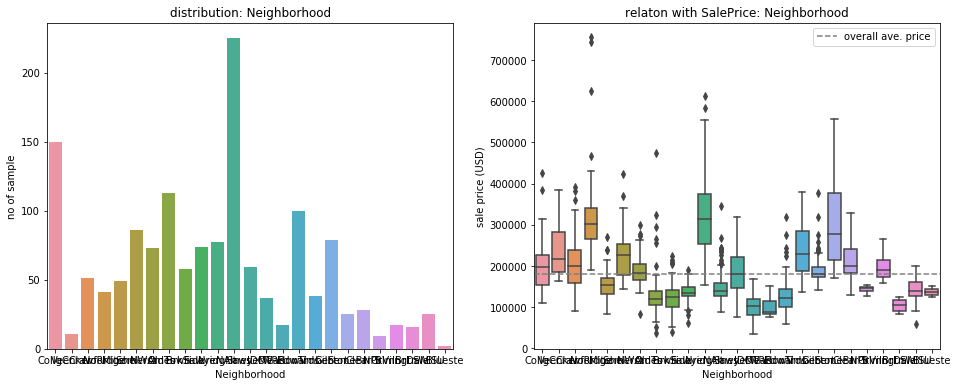

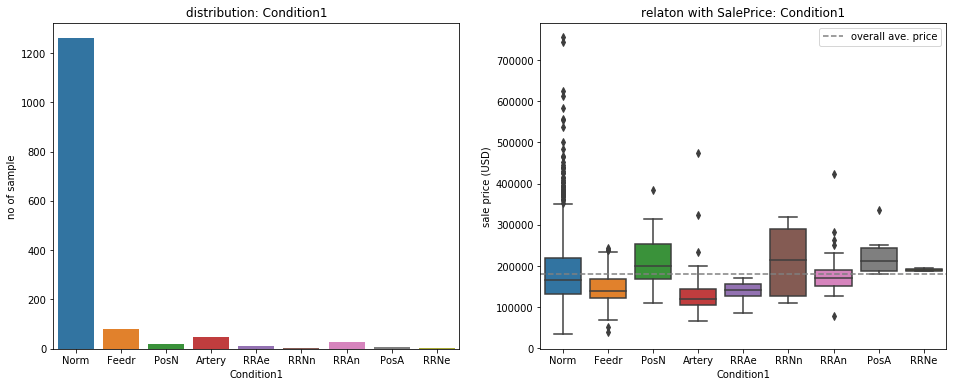

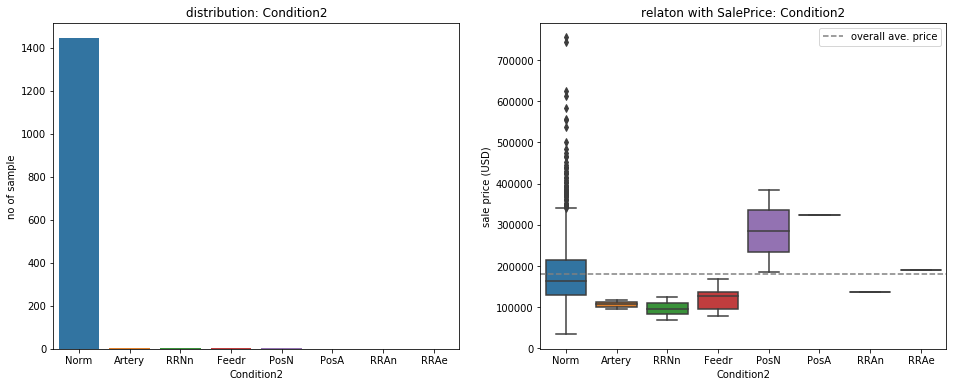

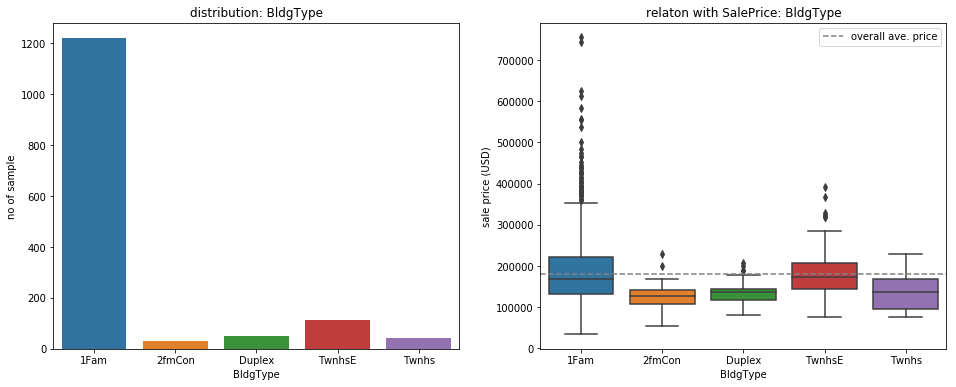

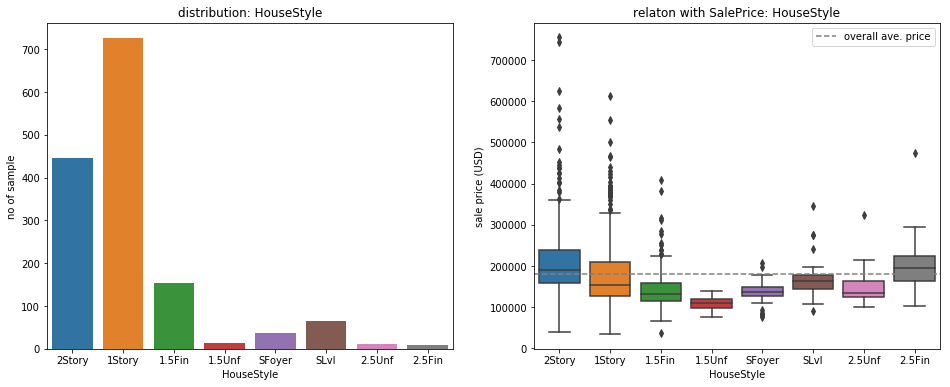

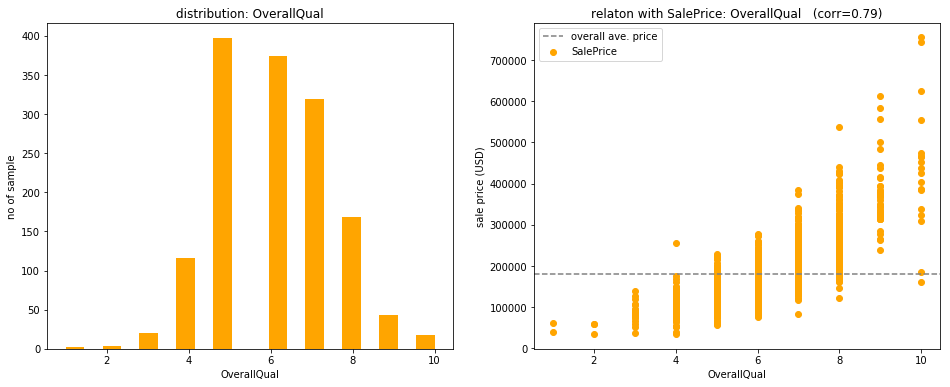

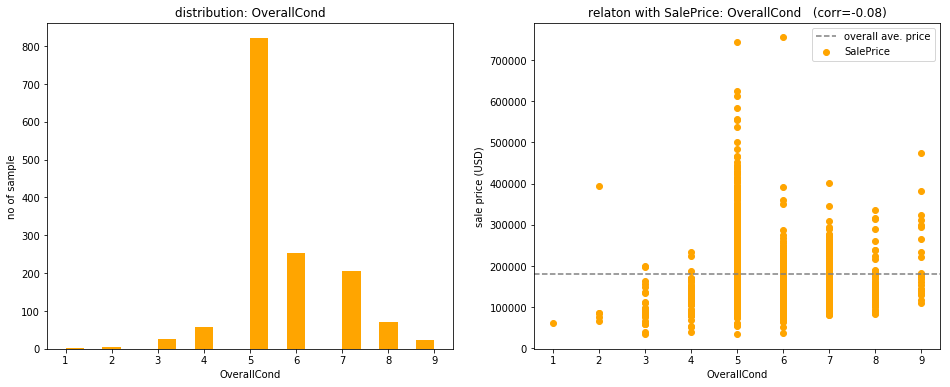

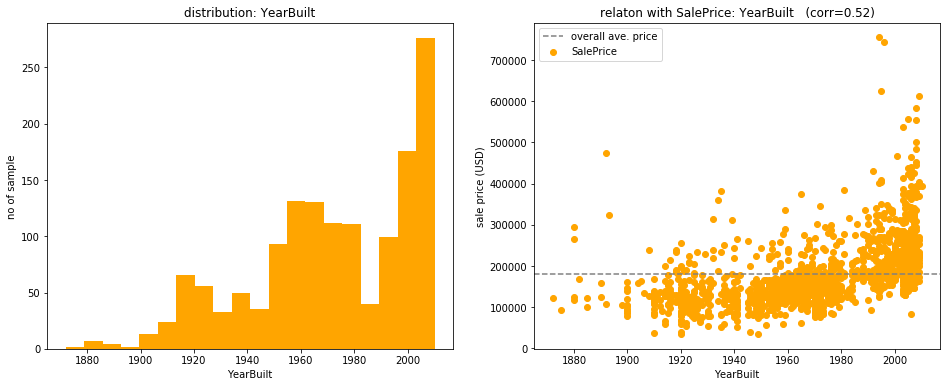

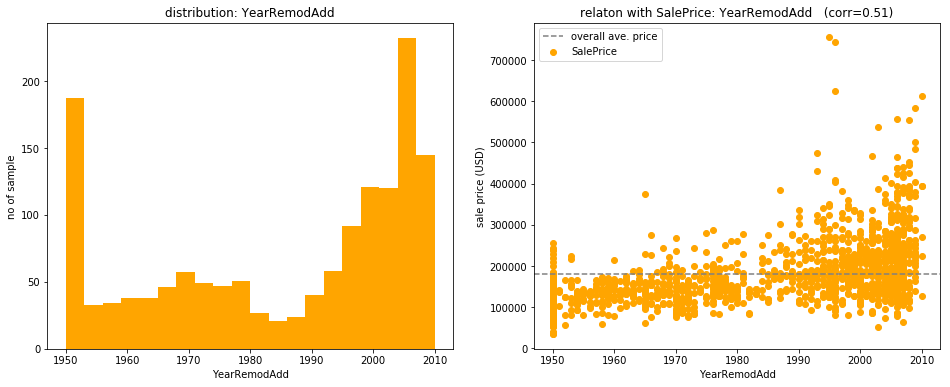

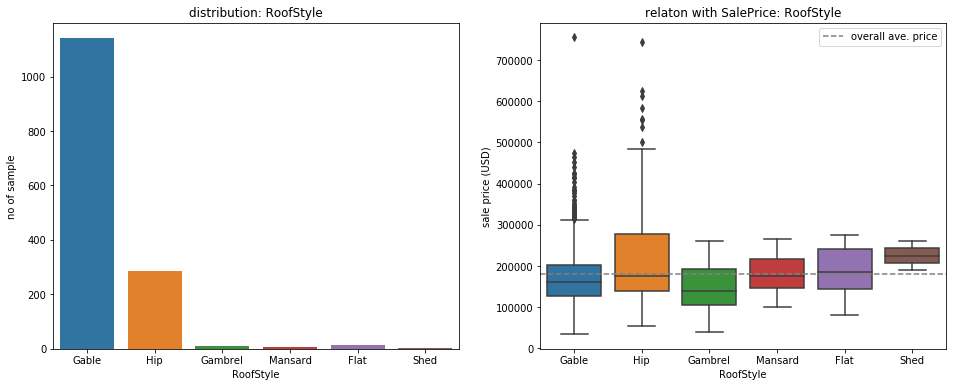

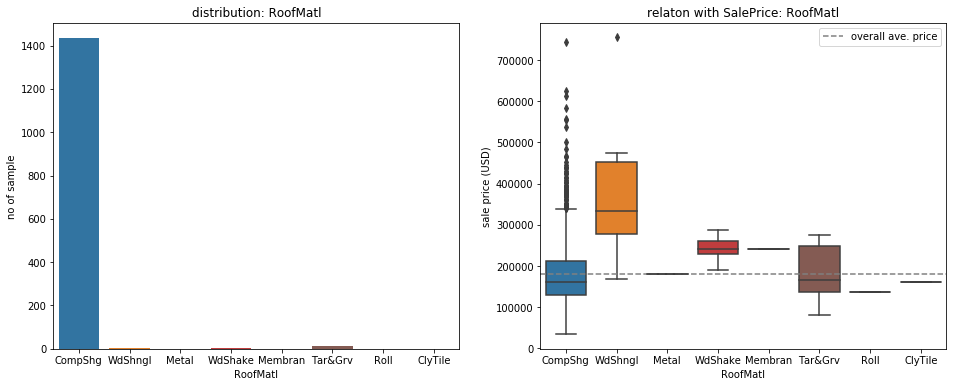

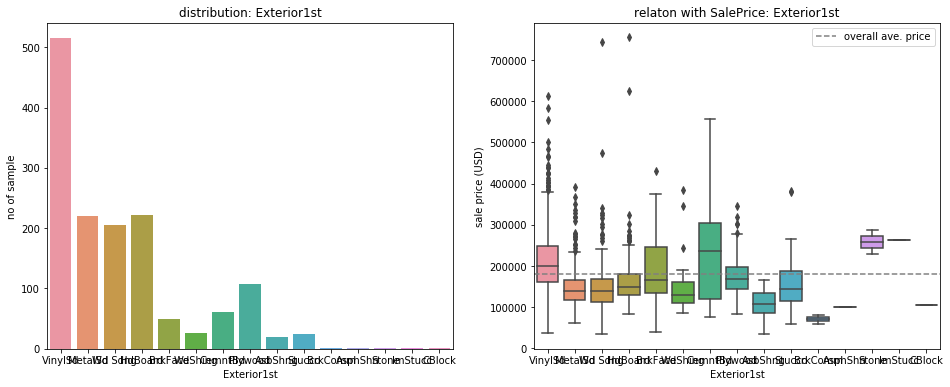

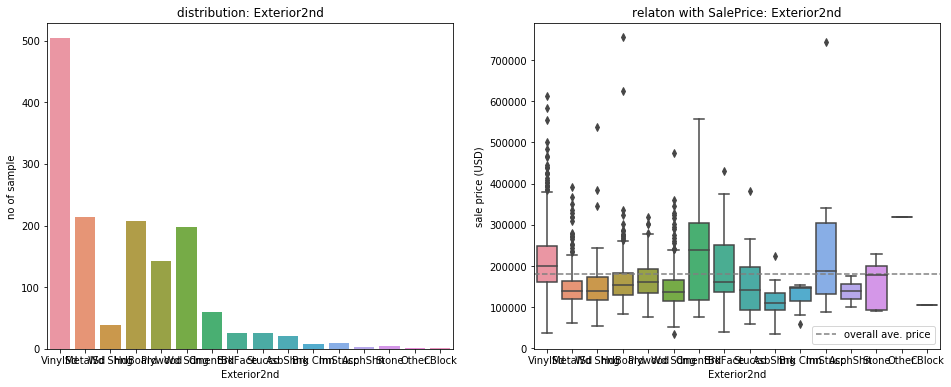

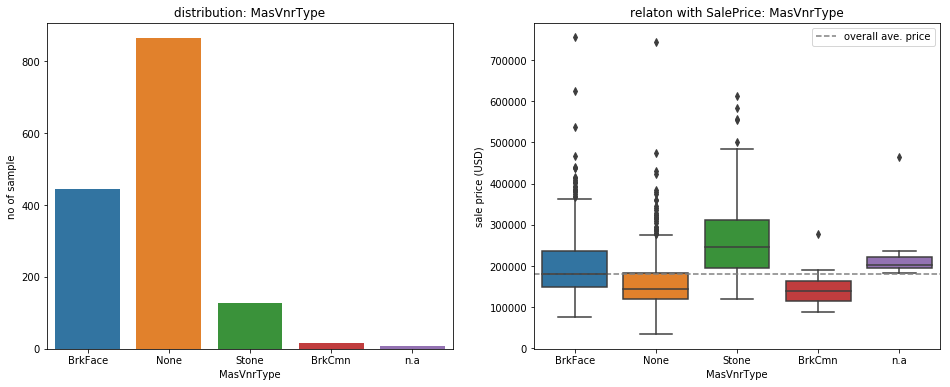

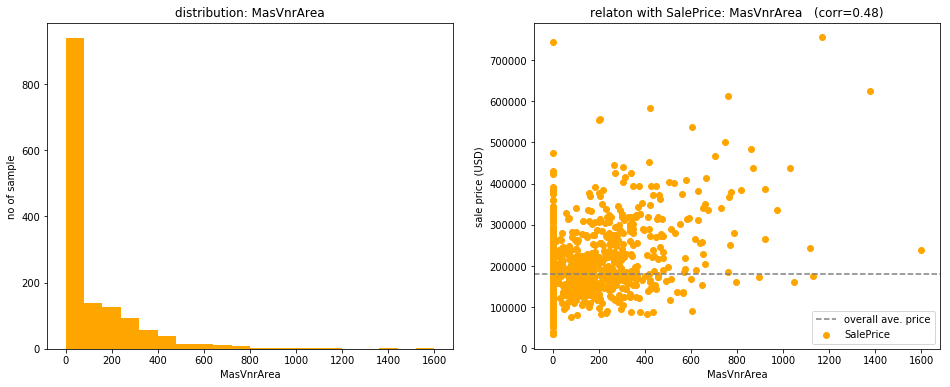

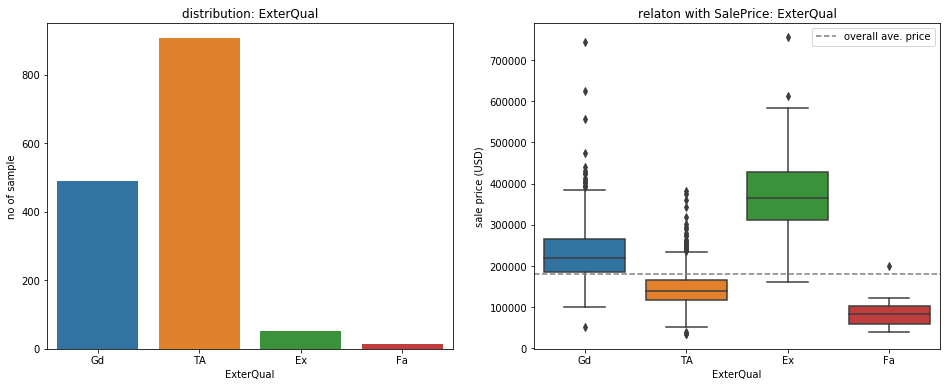

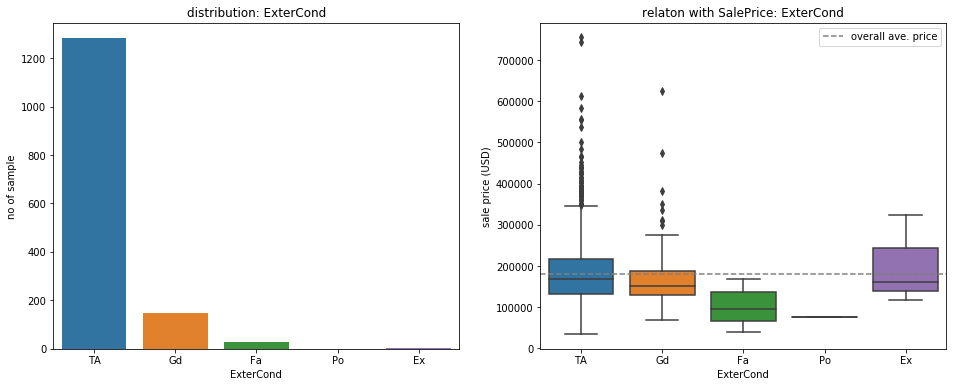

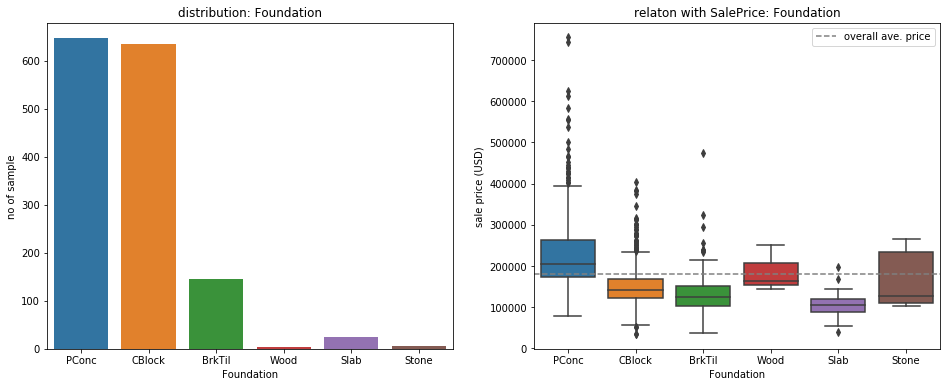

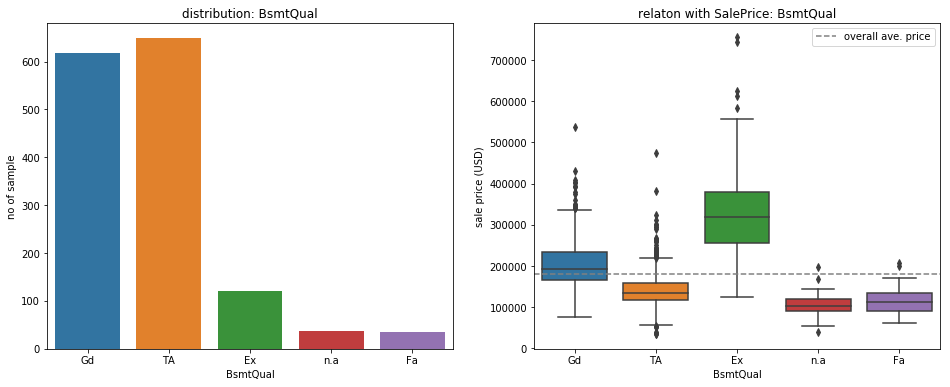

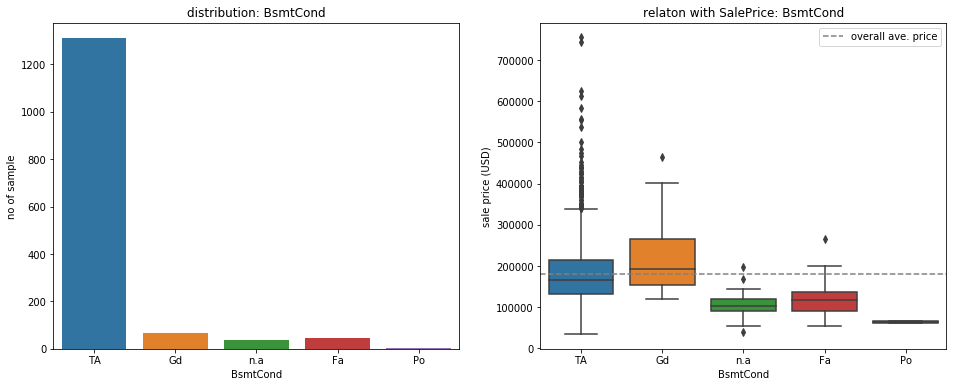

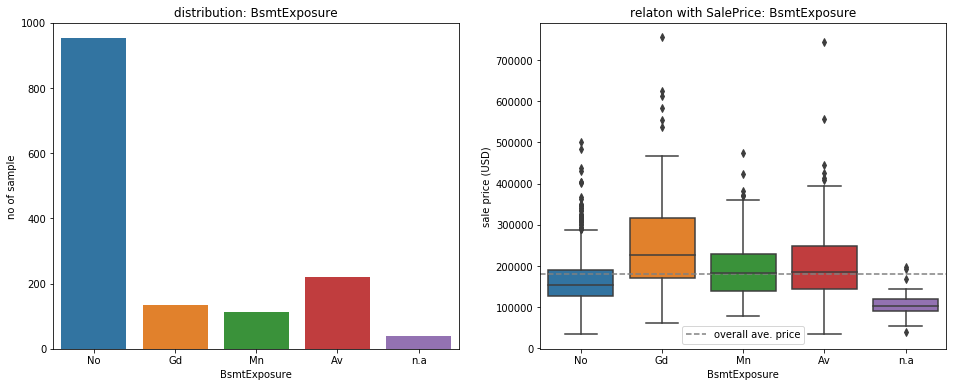

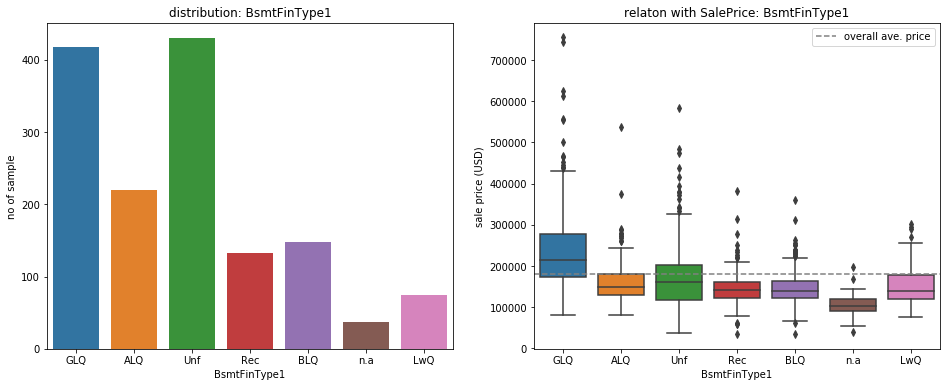

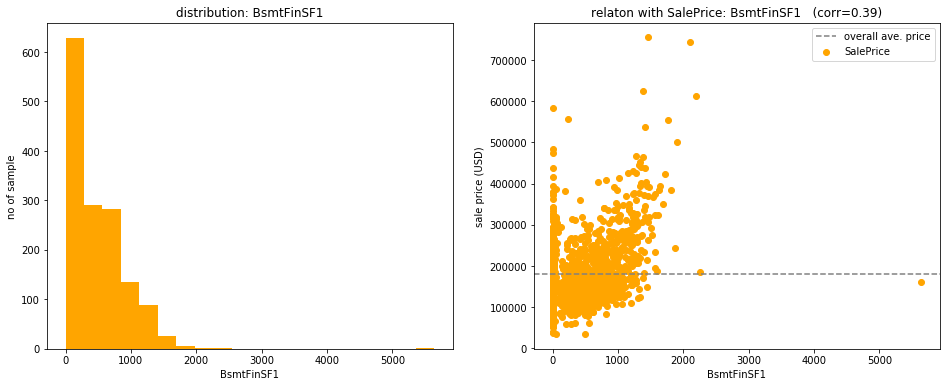

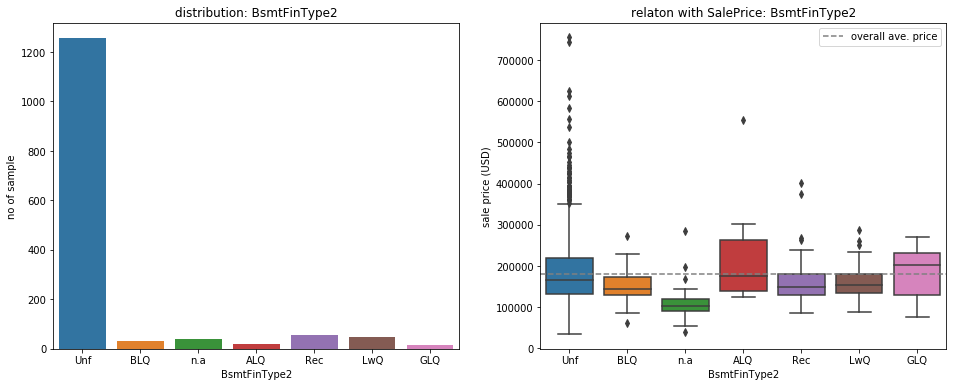

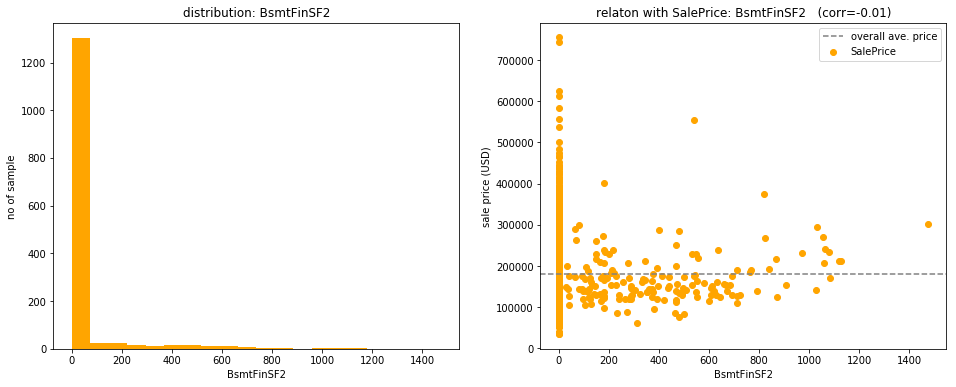

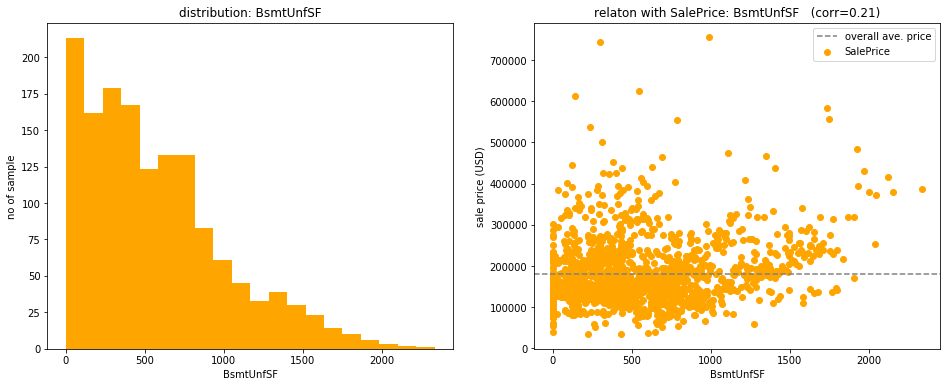

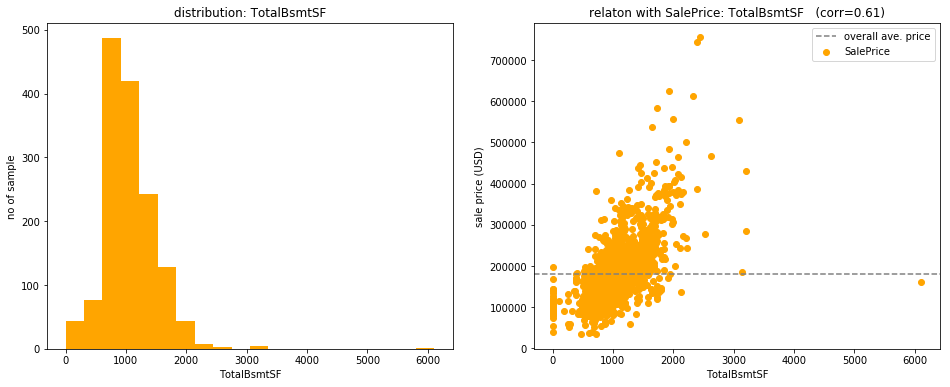

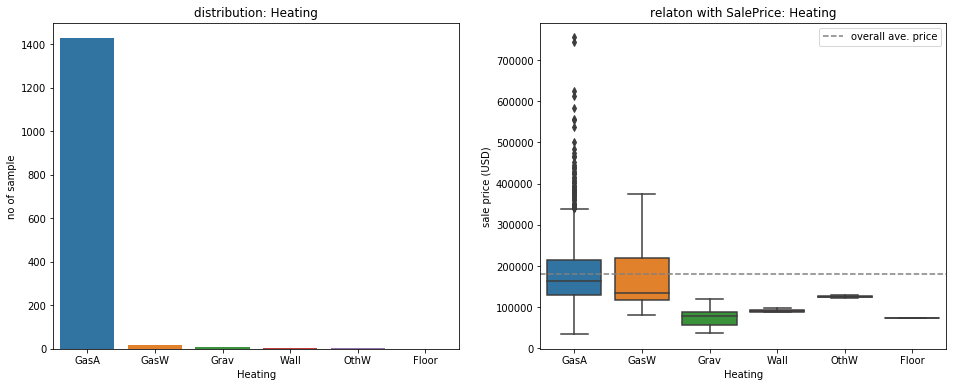

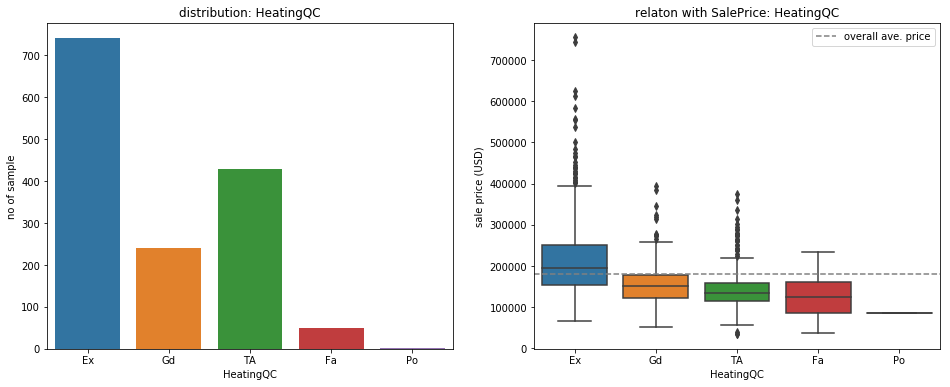

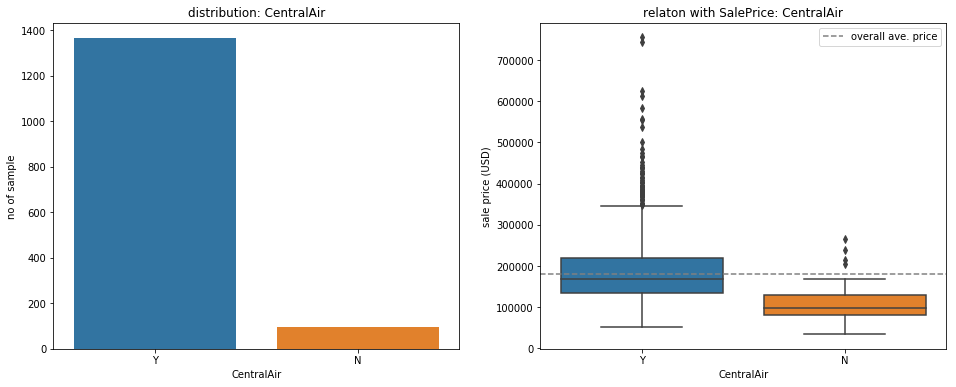

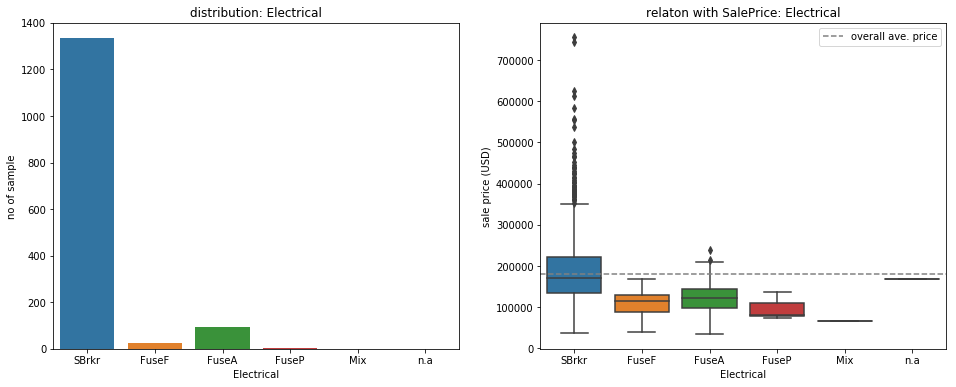

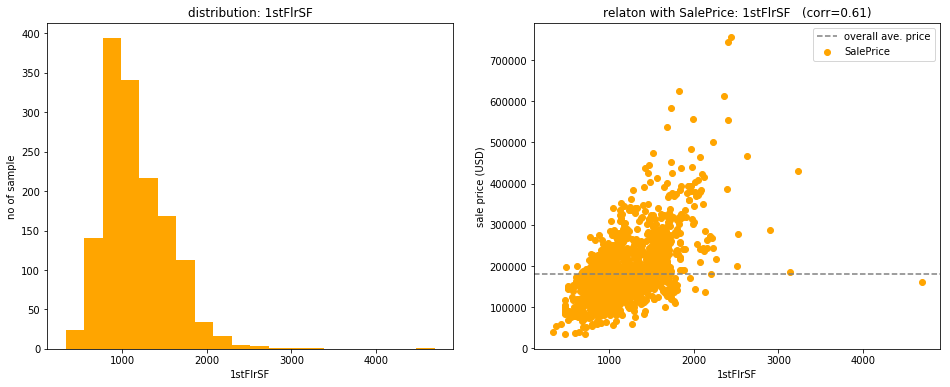

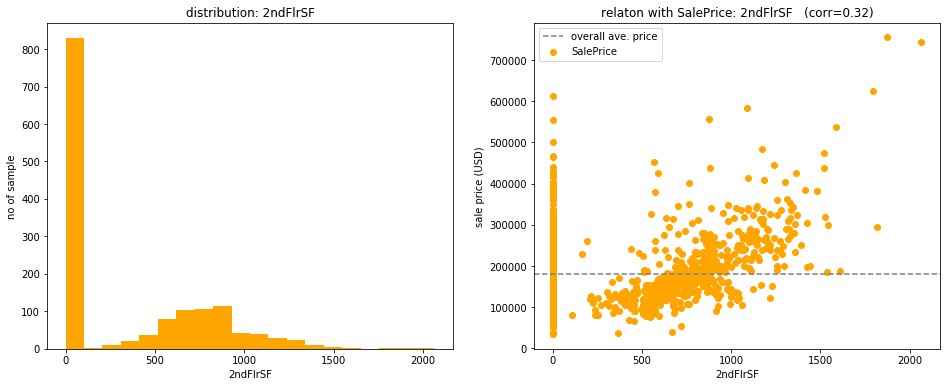

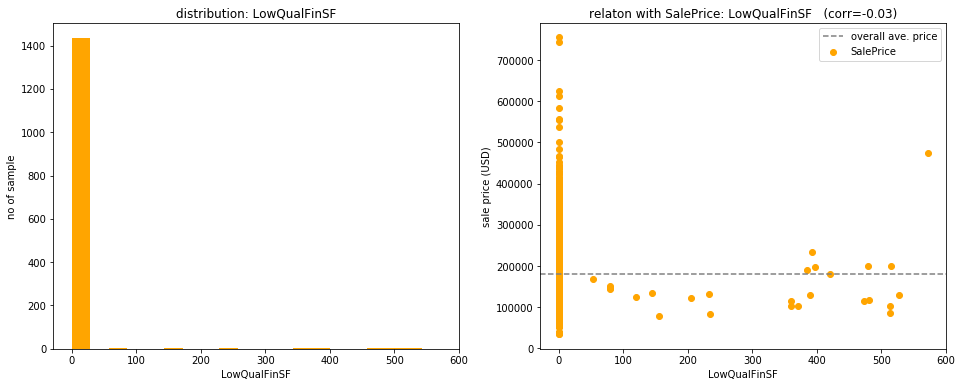

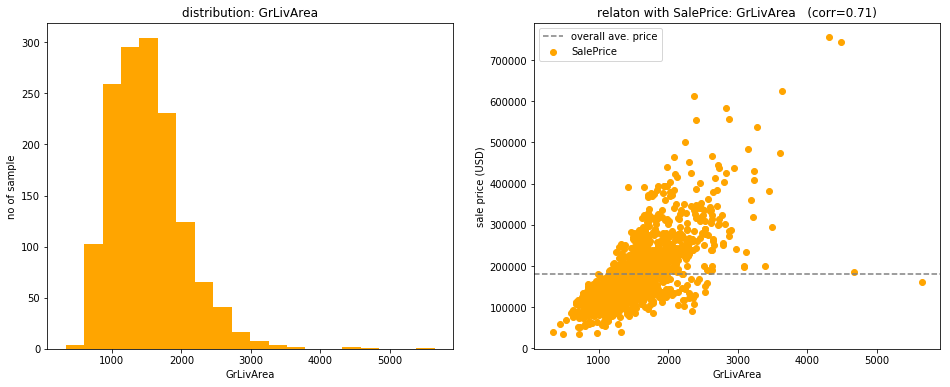

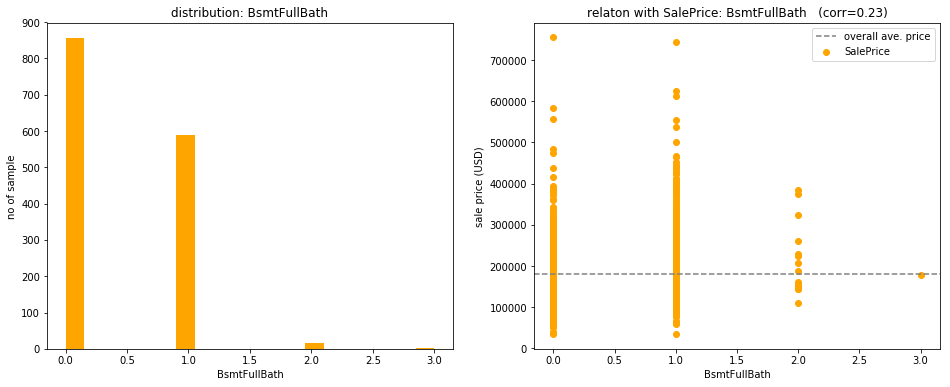

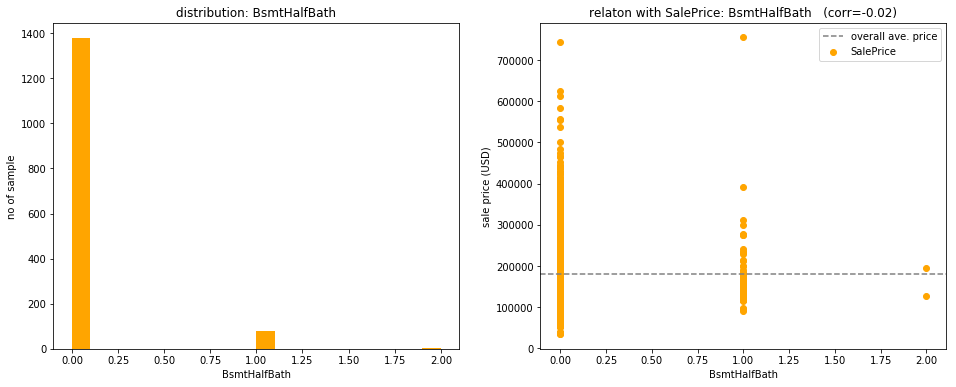

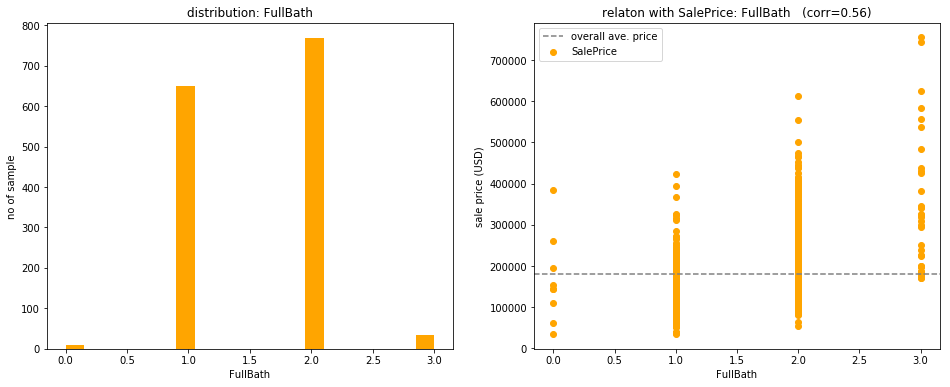

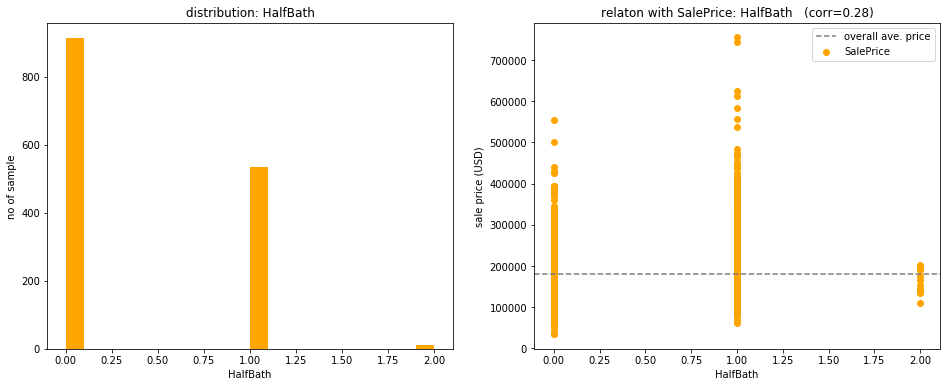

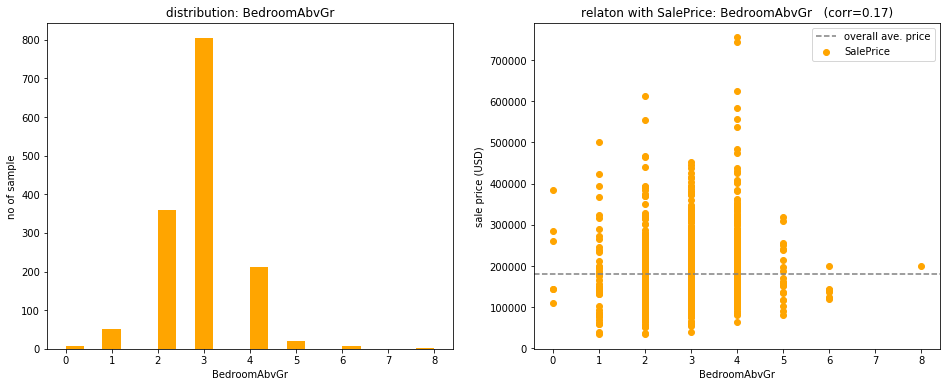

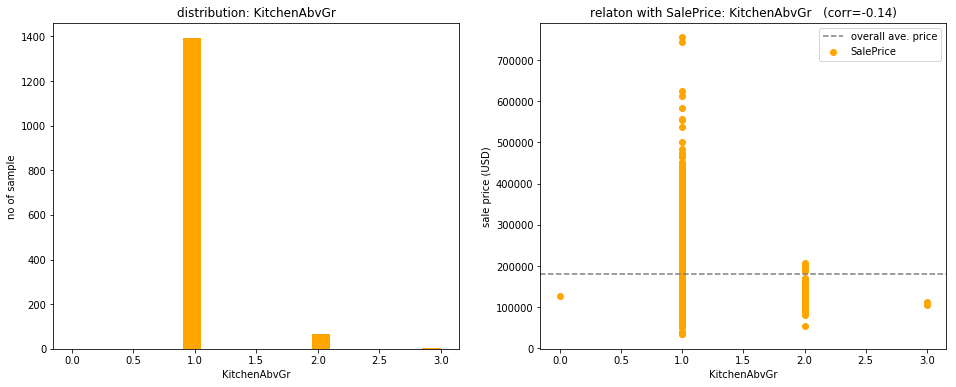

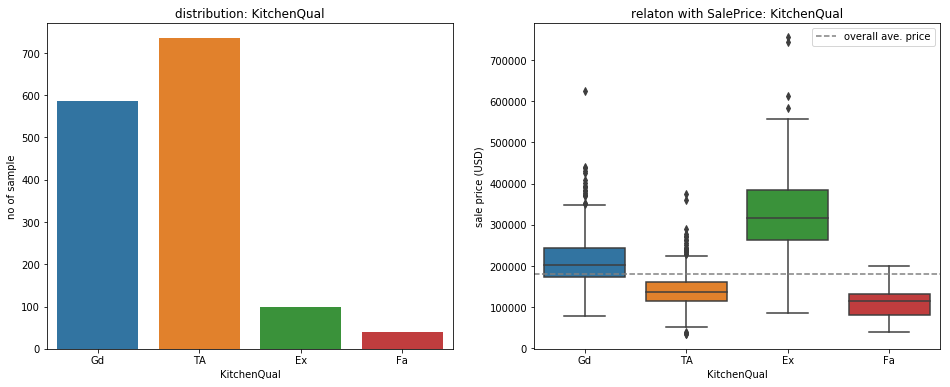

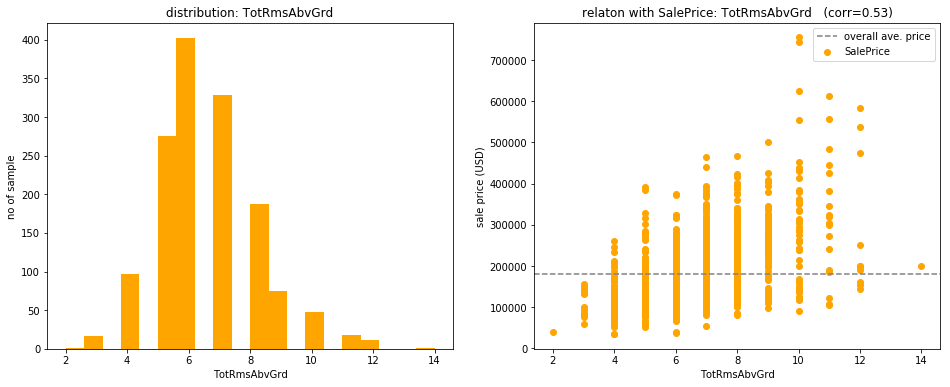

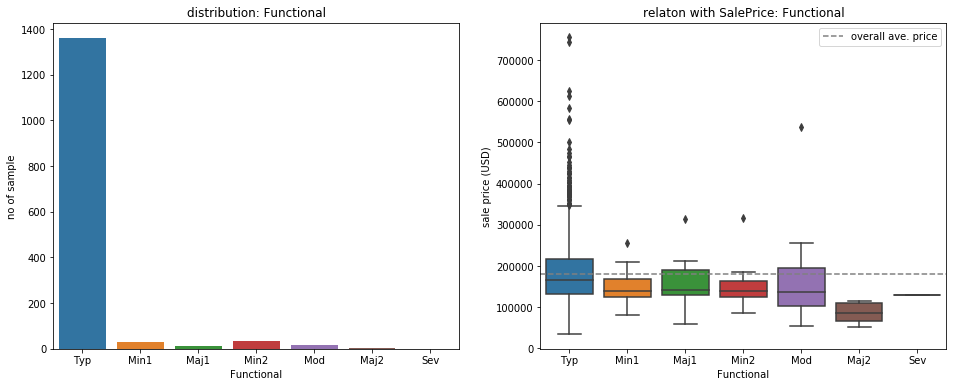

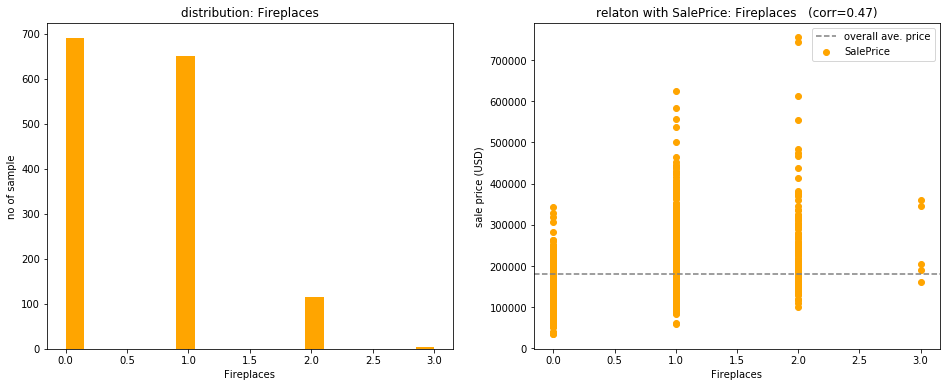

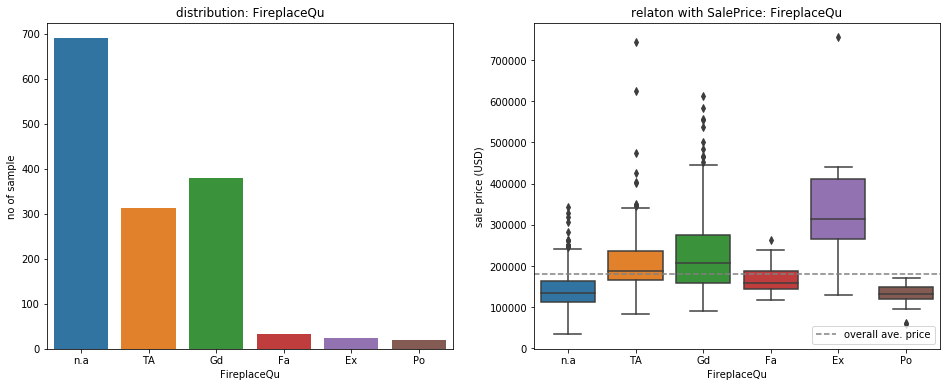

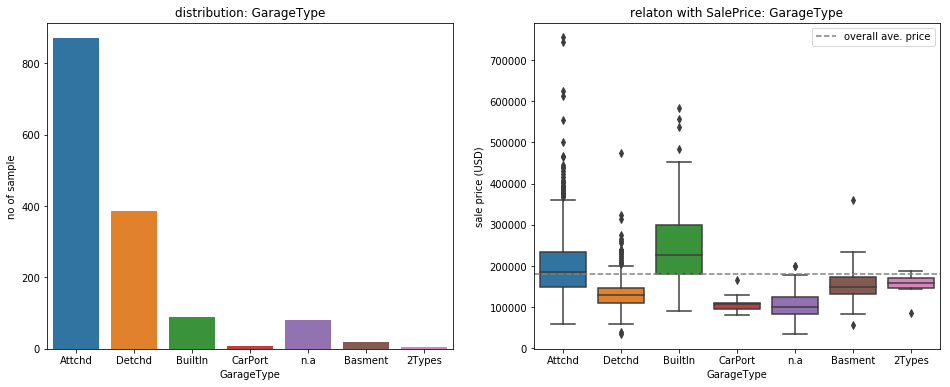

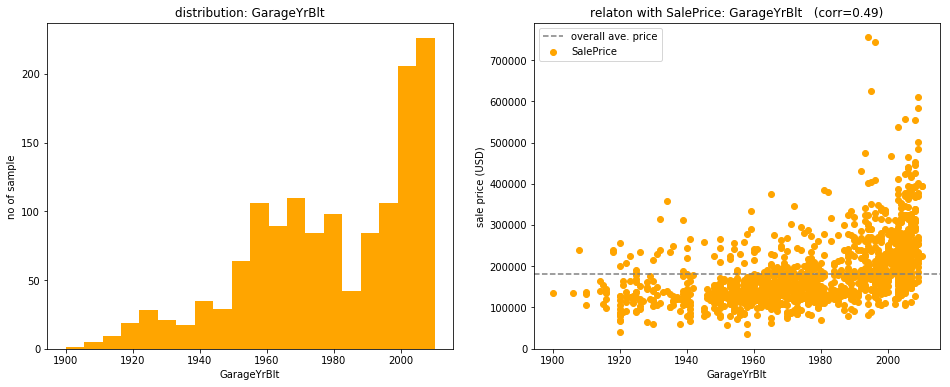

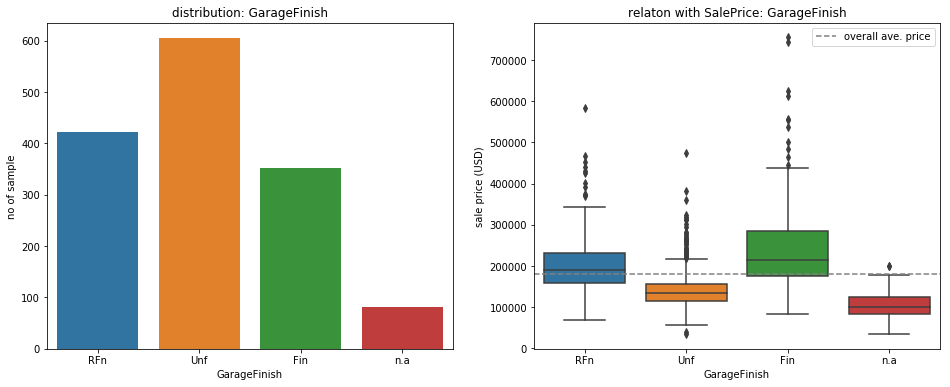

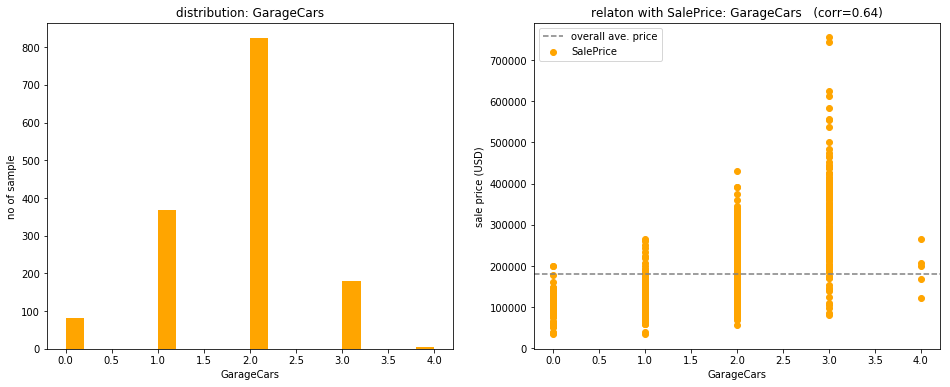

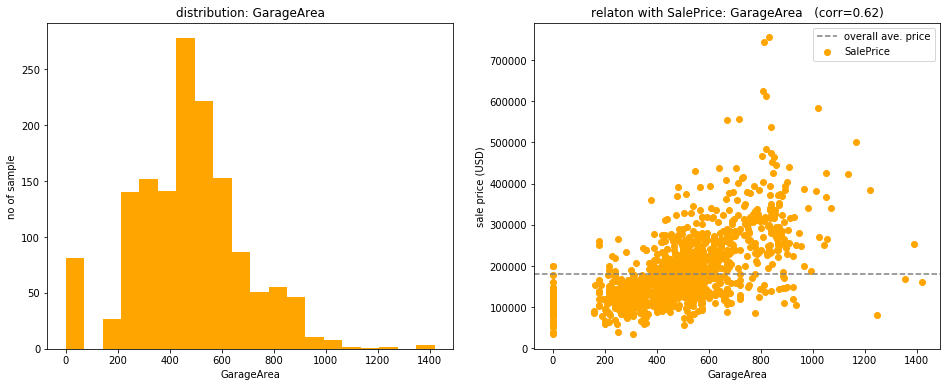

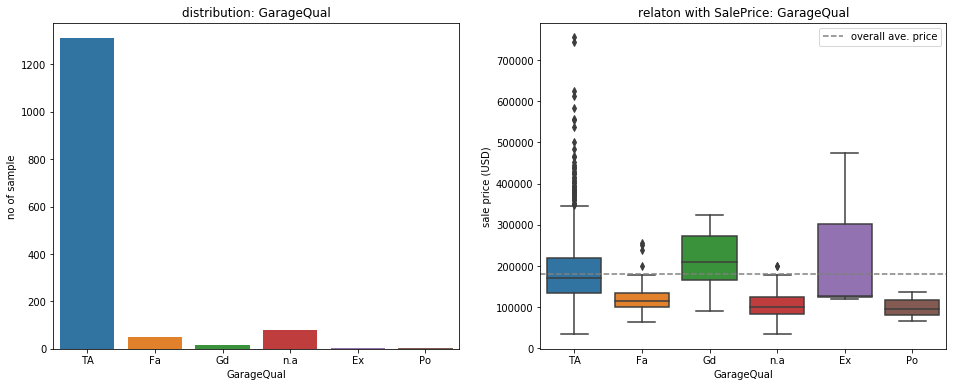

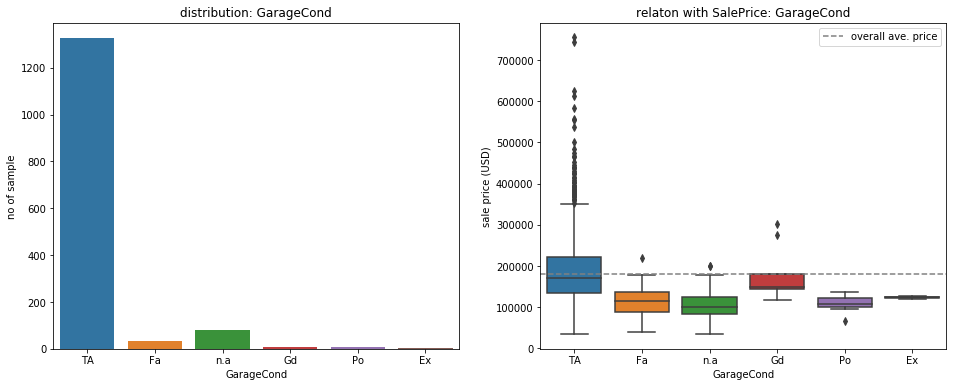

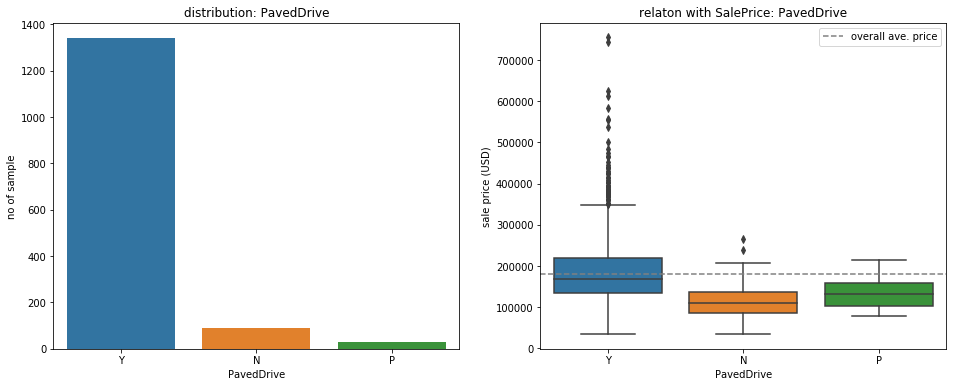

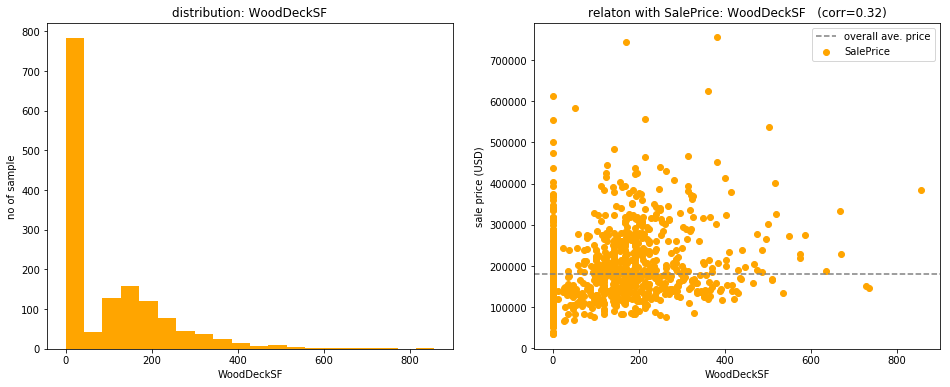

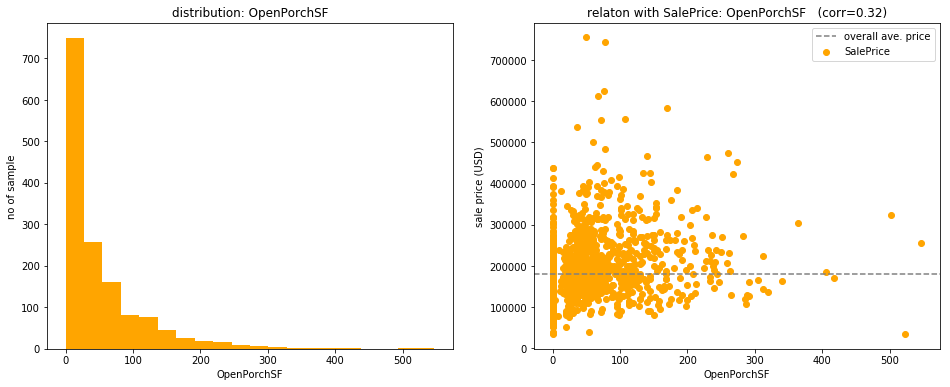

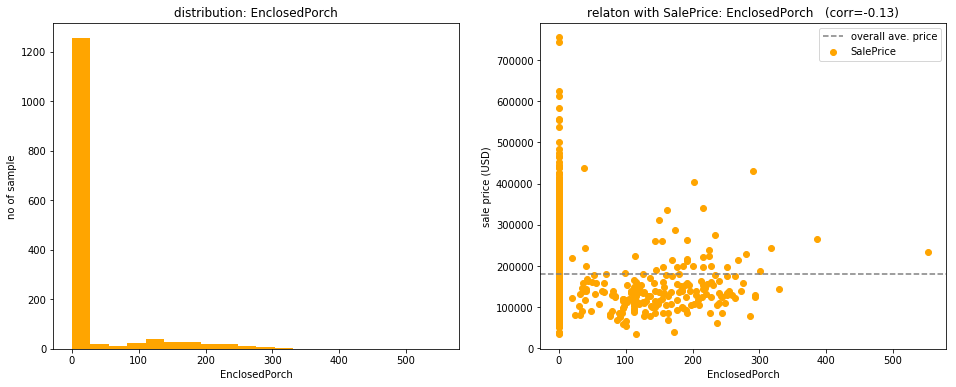

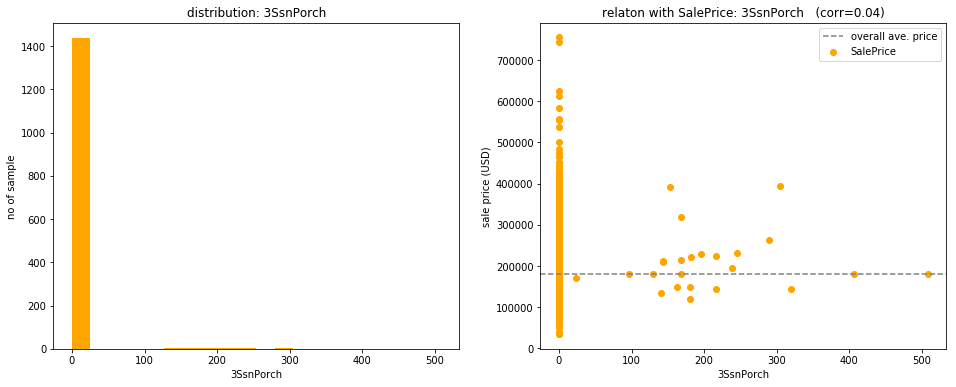

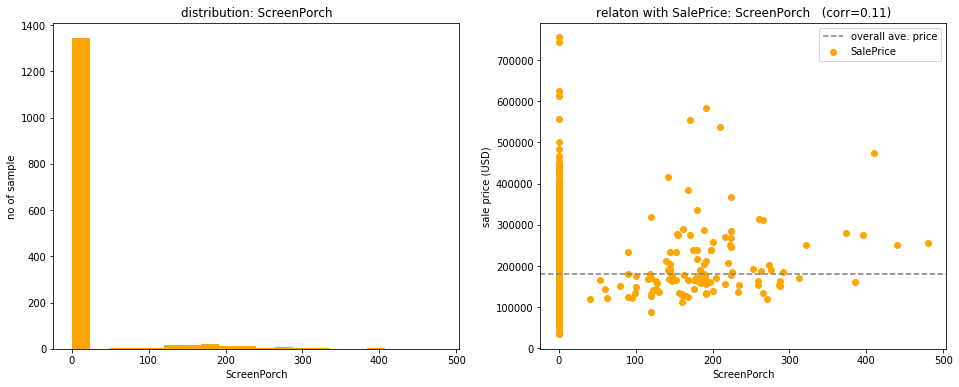

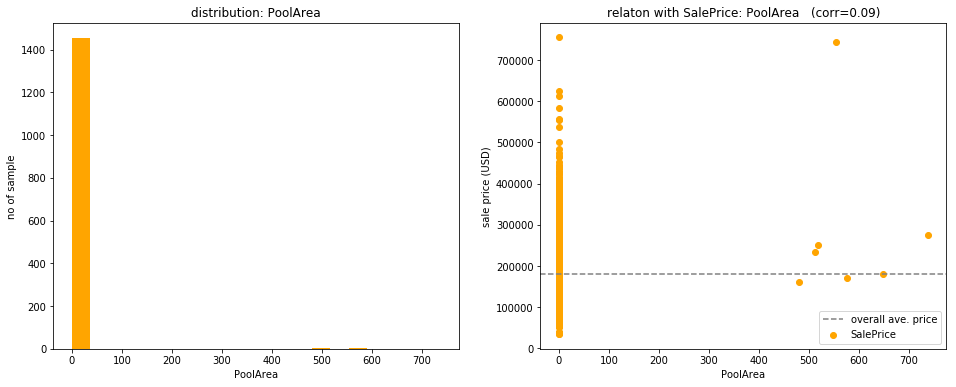

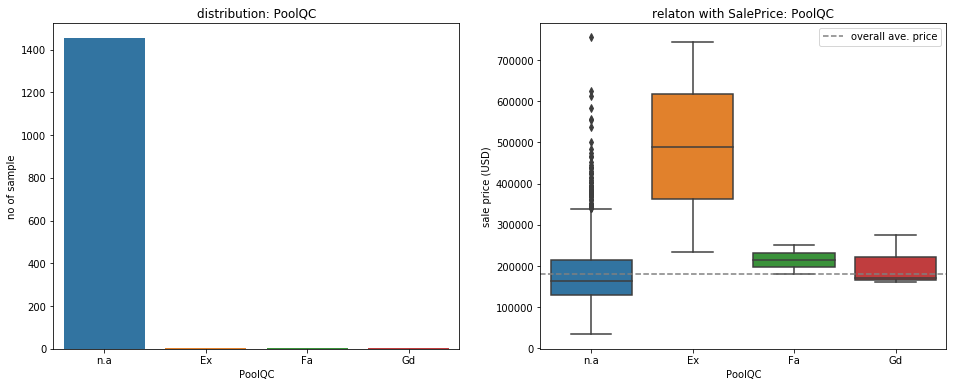

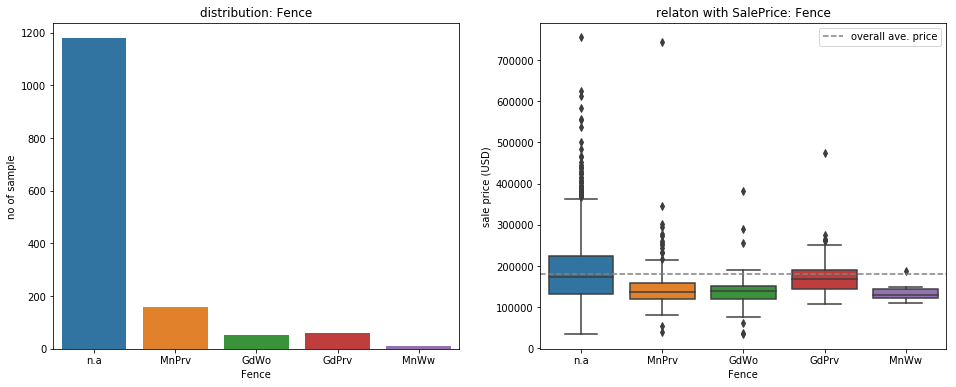

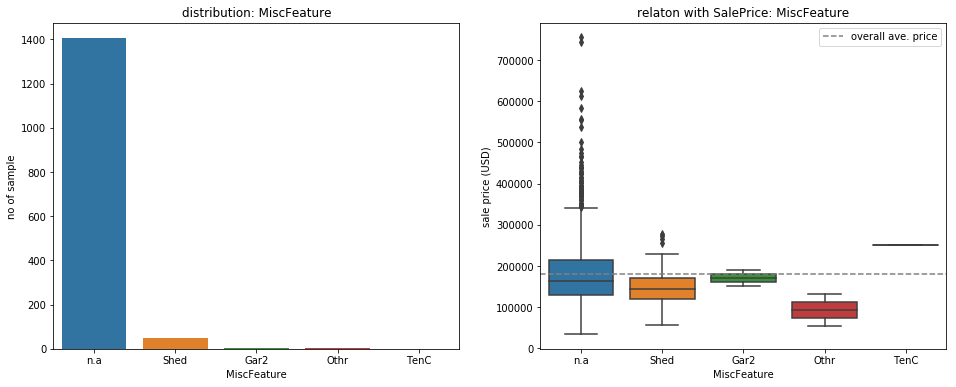

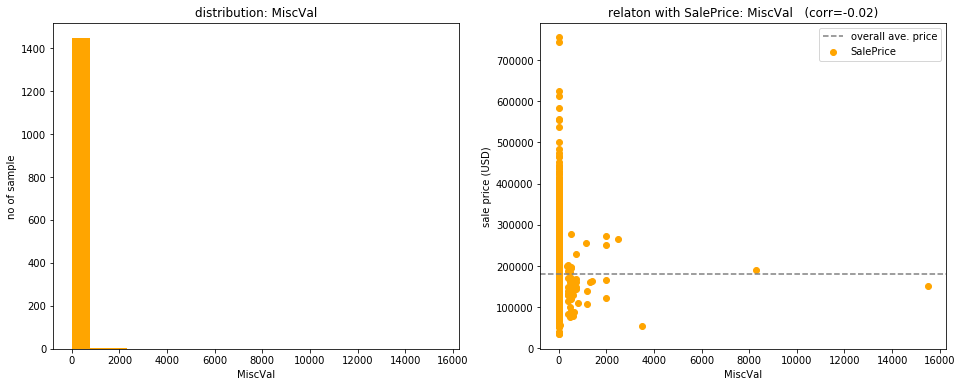

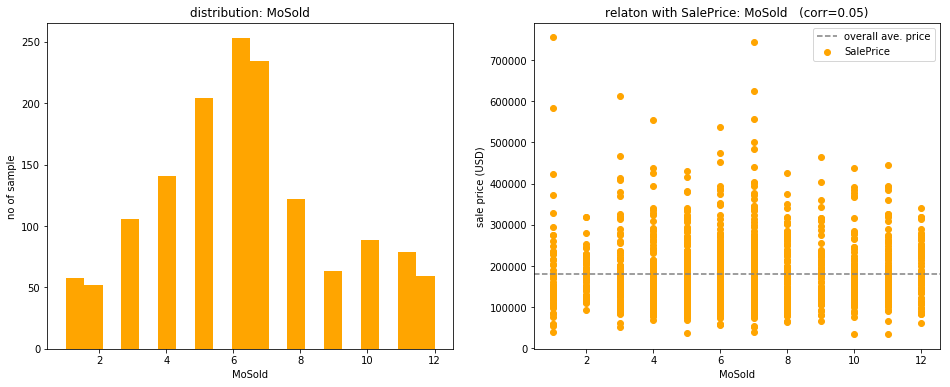

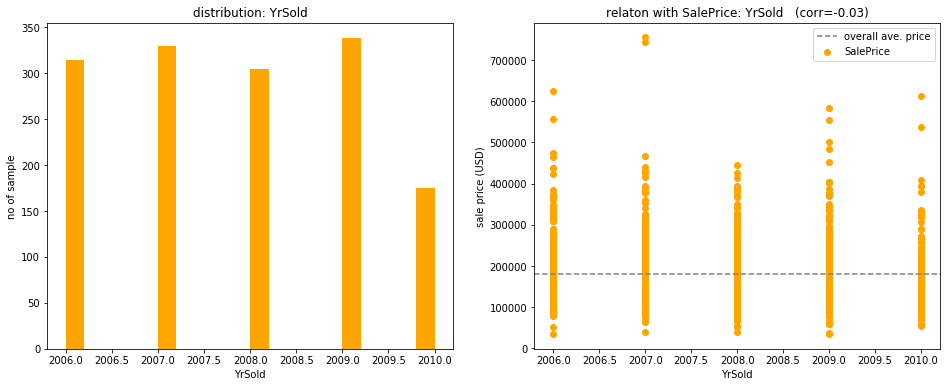

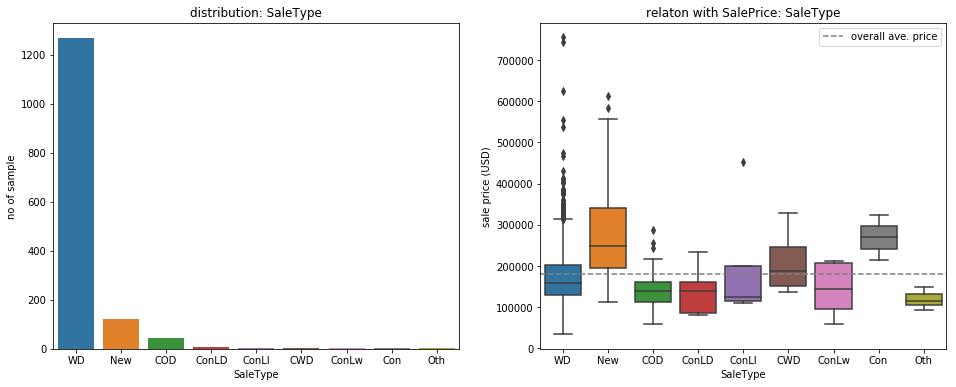

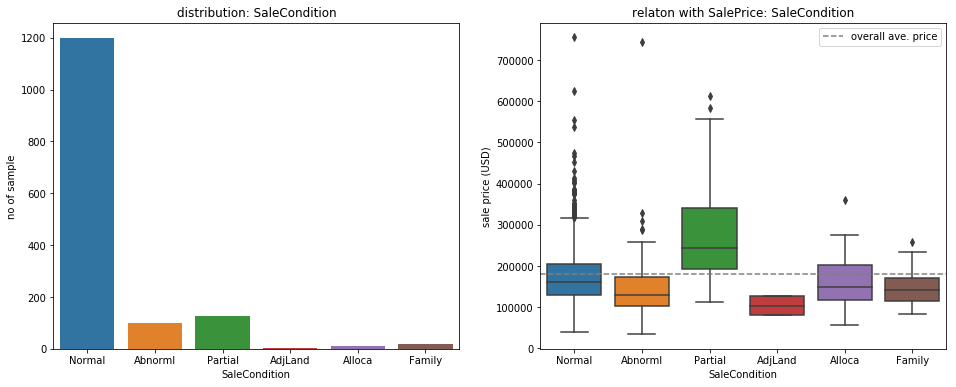

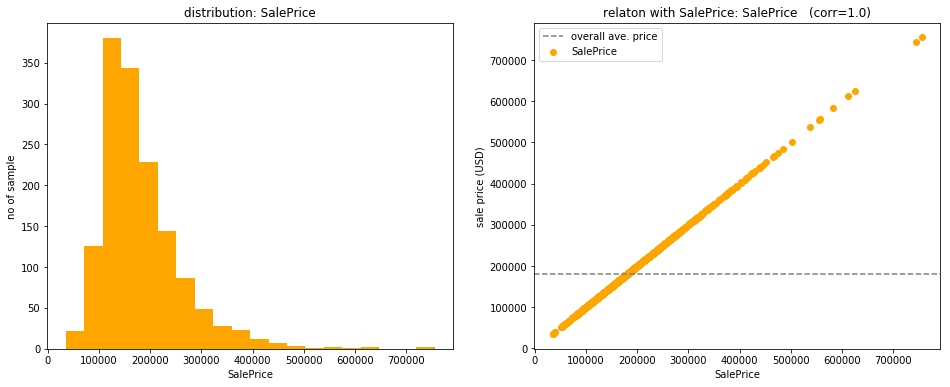

In [12]:

price_mean = train_df['SalePrice'].mean()
corr_series = pd.Series([])

for column_name in train_df:
    dt = train_df[column_name].dtypes
#print(column_name, '\t\t(',dt,')')
    if dt == 'int64' or dt=='float64': 
        
        corr = train_df[column_name].corr(train_df['SalePrice']).round(2)
        
        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(1,2,1)
        ax.hist(train_df[column_name], color='orange', bins = 20)
        ax.set_title('distribution: '+column_name )
        ax.set_xlabel(column_name)
        ax.set_ylabel('no of sample')
        bx = fig.add_subplot(1,2,2)
        bx.scatter(train_df[column_name], train_df['SalePrice'],color='orange')
        bx.set_title('relaton with SalePrice: '+column_name  + '   (corr=' + str(corr) +')')
        bx.set_xlabel(column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        fig.show()
        
        corr_series.set_value(column_name, corr)
        
    if dt == 'object':
        fig = plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        ax = sns.countplot(x=train_df[column_name], data=train_df)
        ax.set_title('distribution: '+column_name)
        ax.set_ylabel('no of sample')
        plt.subplot(1,2,2)
        bx = sns.boxplot(x=train_df[column_name], y=train_df['SalePrice'])
        bx.set_title('relaton with SalePrice: '+column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        fig.show()

<br><br><br>
#### b) Charting collectively
<hr>

Here, first see the impact of inpact each variable to SalePrice in collective way to consider which variables to use for the predicting model.  <br>
Seeing number variables and non-number (categorical) variables separately. 
<br><br>
#### b-1) For number variables 
using correlaction with SalePrice  


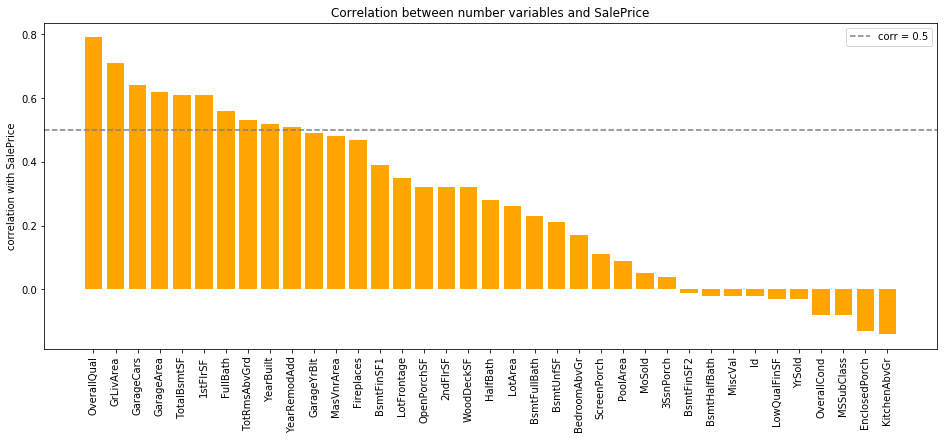

In [13]:
corr_sorted= corr_series.sort_values(ascending=False).drop('SalePrice')

fig = plt.figure(figsize=(16,6))
plt.subplot(1,1,1)
ax = plt.bar(corr_sorted.index,height=corr_sorted, color='orange')
plt.axhline(y=0.5,color= "grey" ,linestyle='--', label='corr = 0.5')
plt.title('Correlation between number variables and SalePrice')
plt.ylabel('correlation with SalePrice')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


<br><br>
Seeing the chart above, following variables have strong correlation with the price of house (chosing correlation > 0.50) 

- Overall Quality 
- GrLivArea 
- Garage Cars 
- Garage Area
- Total Basement Area (square feet)     
- Full Bath
- 1st Floor Area (squire feet)   -- This may be duplicated with Total Basement Area
- Total Rms Abv Grd 
- Year of Built 
- Year of Remod Add

Some maybe correlated together can cannot be used together. see this point later


#### b-2) For non-number (categorical) variables

To evaluate the impact of non-number variables, here use "square of the difference with sample mean" for "each category (not each variable" as the parameter. (maybe there will be other good ways) 


<tr><tr>



# Step 3 : Adding/Processing variables (features) of the dataset 
<hr>

## Processing variables
<hr>

## Adding new variables (features)
<hr>

(TBD)

## Finalising variables to be used for prediction
<hr>

In [123]:
# selecting independent variables to be used for prediction
indep_vars = train_df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]


print('Following varialbes will be used for prediction:')
print(indep_vars.columns.values)

Following varialbes will be used for prediction:
['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd']


<br><br>
# Step 4 : Splitting the dataset for modeling
<hr>

here split the "training" data into "traiing" and "pre-test" and use "training" for building model, and "pre-test" for testing.
Given "test data" is for submitting, therefore that is not for internal testing in true meaning (?)

In [137]:
# install sklearn library first
from sklearn.model_selection import train_test_split

In [146]:
x_train, x_pretest, y_train, y_pretest = train_test_split(indep_vars, train_df['SalePrice'], test_size=0.3)

In [147]:
print(x_train.shape, y_train.shape, x_pretest.shape,y_pretest.shape)

(1022, 10) (1022,) (438, 10) (438,)


<br><br>
# Step 5 : Creating the model
<hr>

Here use Multilinear regression for prediction.
<br><br> The reasons are: <br><br>
- this is one of the basic and easy to implement (others I do not know) 
- predicted variable (Sale Price of the House) is quantitative variable(If that was a qualitative data, may used logistic regression)<br><br>

In [14]:
from sklearn import linear_model

First, use only one variable to predict for testing

In [149]:
X = x_train[['GrLivArea']]
Y = y_train

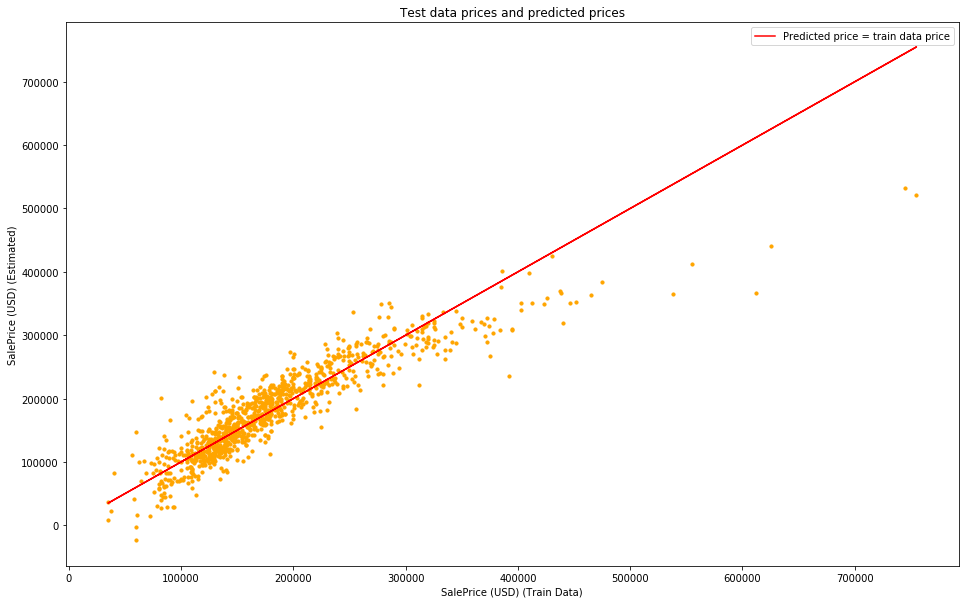

In [154]:
linReg = linear_model.LinearRegression()
linReg.fit(X,Y)

figdataX = Y
figdataY = linReg.predict(X)

plt.figure(figsize=(16,10))
plt.plot(figdataX,figdataX,color='red', label='Predicted price = train data price')
plt.scatter(figdataX,figdataY, s=10, c='orange')
plt.title('Test data prices and predicted prices')
plt.xlabel('SalePrice (USD) (Train Data)')
plt.ylabel('SalePrice (USD) (Estimated)')
plt.legend()

In [152]:
print('score:',linReg.score(X,Y))

score: 0.5378343937281578


Using multiple variables to estimate

In [160]:
X = x_train
Y = y_train

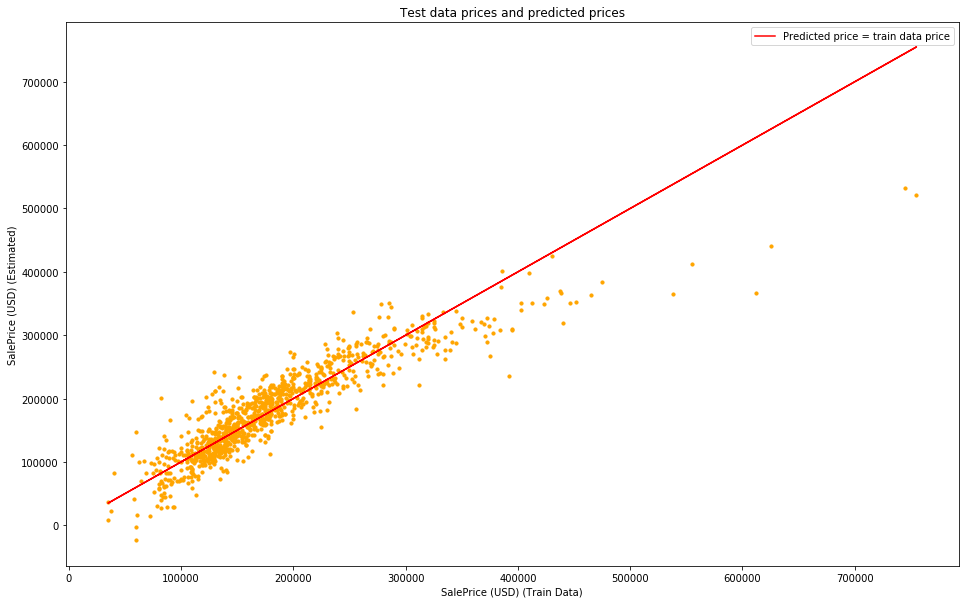

In [161]:
linReg = linear_model.LinearRegression()
linReg.fit(X,Y)

figdataX = Y
figdataY = linReg.predict(X)

plt.figure(figsize=(16,10))
plt.plot(figdataX,figdataX,color='red', label='Predicted price = train data price')
plt.scatter(figdataX,figdataY, s=10, c='orange')
plt.title('Test data prices and predicted prices')
plt.xlabel('SalePrice (USD) (Train Data)')
plt.ylabel('SalePrice (USD) (Estimated)')
plt.legend()

In [162]:
print('score:',linReg.score(X,Y))

score: 0.8234510322381279


<br><br><br>
# Step 6 : Evaluating/Modifying of the model
<hr>

Using another part of dataset, evaluate the model

<br><br>

According to project overview, the KPI for the evaluation for this project is: <br><br>
Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price
https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation

Here, apply the model to pre-test data

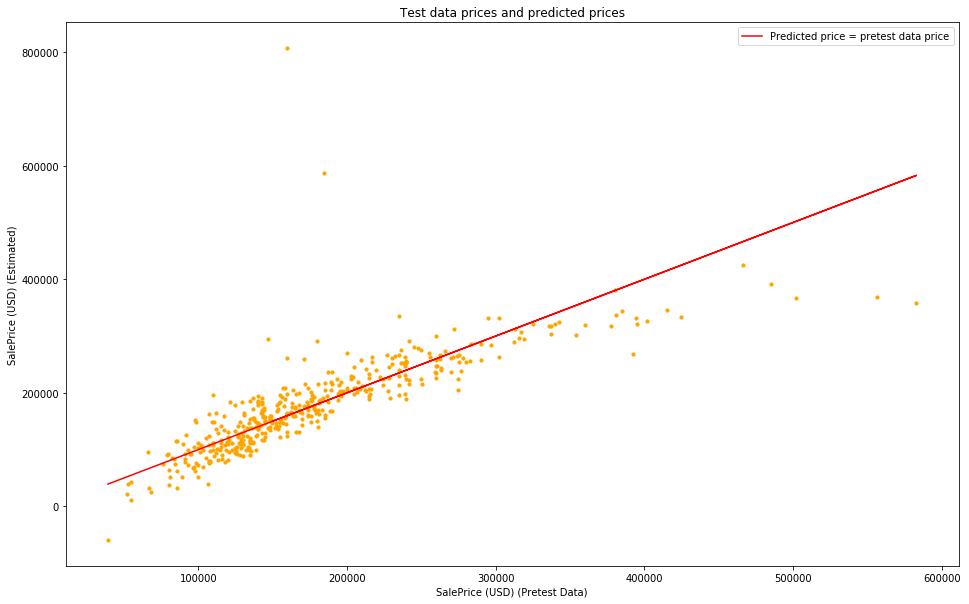

In [196]:
y_pred = pd.Series(linReg.predict(x_pretest))


figdataX = y_pretest
figdataY = y_pred

plt.figure(figsize=(16,10))
plt.plot(figdataX,figdataX,color='red', label='Predicted price = pretest data price')
plt.scatter(figdataX,figdataY, s=10, c='orange')
plt.title('Test data prices and predicted prices')
plt.xlabel('SalePrice (USD) (Pretest Data)')
plt.ylabel('SalePrice (USD) (Estimated)')
plt.legend()

There is a minus value in prediction. That should be fixed. 
Changed minues value into 1, so that it is possible to use logarithm

In [208]:
y_pred = y_pred.where(y_pred>0,1)

<br><br>
Then calculate RMSE of logarithm 
<br><br>

In [207]:
from sklearn.metrics import mean_squared_error

log_y_true = np.log(y_pretest)
log_y_pred = np.log(y_pred)

mse = mean_squared_error(log_y_true, log_y_pred)

rmse = np.sqrt(mse)

rmse

0.5599206875883442

0.56 is about 4100/4300 in the ranking  <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard

<br><br><br>
# Step 7 : Submitting the model
<hr>

### apply the model to test data set (TBD)

### formatting the data file to align with the requirement (TBD)

### submit (TBD)